# **EJERCICIO PRACTICO: SEGMENTACION DE ALOJAMIENTO Y PREDICCION DE PRECIO**

## Objetivo


Realizar un análisis completo del conjunto de datos de Airbnb para Identificar y describir diferentes segmentos de oferta (por zona, tipo, precio) y posteriormente construir un modelo predictivo en Jupyter Notebook (Python)

Datos: Se trabajo con el conjunto de datos disponible en Kaggle bajo el nombre Airbnb Open Data, accesible en el siguiente enlace: https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata/data

En este caso se adjunta el doc tipo csv "Airbnb_Open_Data.csv"

## Instrucciones Generales


Herramientas permitidas:
+ Limpieza de datos: pandas o SQL
+ Visualizaciones: matplotlib o seaborn u otro
+ Modelo predictivo: cualquier librería de Python


## Actividades a Realizar


### Limpieza de datos:

    * Detección y tratamiento de datos faltantes
    * Transformación de columnas útiles
    * Identificación de outliers
    * Preparación de variables para el análisis

### Carga de datos y paqueterias a utilizar.

In [2]:
# Carga de datos y pacqueterias necesarias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Librerías de Scikit-learn para el modelado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')


In [4]:
# Carga del dataset
df_airbnb = pd.read_csv(r'C:\Users\Rogelio\Downloads\Ejercicio_Practico\Airbnb_Open_Data.csv', index_col='id')

### Tratamiento de Datos

In [5]:
#Cree una copia para las explicaciones
df_airbnb_copy = pd.read_csv(r'C:\Users\Rogelio\Downloads\Ejercicio_Practico\Airbnb_Open_Data.csv', index_col='id')

# Información general del DataFrame
df_airbnb_copy.info()
print(df_airbnb_copy.describe(include= 'all').round(2))

#Checar valores faltantes
print('Missing Values:')
print(df_airbnb_copy.isnull().mean().round(4) * 100)

#Checar valores duplicados
print('Duplicated Values:')
print(df_airbnb_copy.duplicated().sum())


df_airbnb_copy.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 102599 entries, 1001254 to 6094647
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   NAME                            102349 non-null  object 
 1   host id                         102599 non-null  int64  
 2   host_identity_verified          102310 non-null  object 
 3   host name                       102193 non-null  object 
 4   neighbourhood group             102570 non-null  object 
 5   neighbourhood                   102583 non-null  object 
 6   lat                             102591 non-null  float64
 7   long                            102591 non-null  float64
 8   country                         102067 non-null  object 
 9   country code                    102468 non-null  object 
 10  instant_bookable                102494 non-null  object 
 11  cancellation_policy             102523 non-null  object 
 12  room type     

NAME      host id  \
id                                                                       
1001254                Clean & quiet apt home by the park  80014485718   
1002102                             Skylit Midtown Castle  52335172823   
1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
1002755                                               NaN  85098326012   
1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

        host_identity_verified host name neighbourhood group neighbourhood  \
id                                                                           
1001254            unconfirmed  Madaline            Brooklyn    Kensington   
1002102               verified     Jenna           Manhattan       Midtown   
1002403                    NaN     Elise           Manhattan        Harlem   
1002755            unconfirmed     Garry            Brooklyn  Clinton Hill   
1003689               verified    Lyndon           Manhattan   East Harlem   

              lat      long        country country code  ... service fee  \
id                                                       ...               
1001254  40.64749 -73.97237  United States           US  ...       $193    
1002102  40.75362 -73.98377  United States           US  ...        $28    
1002403  40.80902 -73.94190  United States           US  ...       $124    
1002755  40.68514 -73.95976  United States           US  ...        $74    
1003689  40.79851 -73.94399  United States           US  ...        $41    

        minimum nights number of reviews  last review reviews per month  \
id                                                                        
1001254           10.0               9.0   10/19/2021              0.21   
1002102           30.0              45.0    5/21/2022              0.38   
1002403            3.0               0.0          NaN               NaN   
1002755           30.0             270.0     7/5/2019              4.64   
1003689           10.0               9.0   11/19/2018              0.10   

        review rate number  calculated host listings count  availability 365  \
id                                                                             
1001254                4.0                             6.0             286.0   
1002102                4.0                             2.0             228.0   
1002403                5.0                             1.0             352.0   
1002755                4.0                             1.0             322.0   
1003689                3.0                             1.0             289.0   

                                               house_rules  license  
id                                                                   
1001254  Clean up and treat the home the way you'd like...      NaN  
1002102  Pet friendly but please confirm with me if the...      NaN  
1002403  I encourage you to use my kitchen, cooking and...      NaN  
1002755                                                NaN      NaN  
1003689  Please no smoking in the house, porch or on th...      NaN  

[5 rows x 25 columns]

Al cargar la base de datos, cree una copia de seguridad para preservar los datos originales y tener un punto de referencia para los cambios a realizar.

Hallazgos Clave en los Datos:

>   Estandarización de columnas: Los nombres de las columnas no siguen un formato consistente, ya que algunos están en mayúsculas o contienen espacios. Esto es un problema que debemos resolver para asegurar un manejo de datos óptimo.
> 
>   Columnas con valores únicos: A pesar de que la base de datos contiene más de 100,000 entradas, encontramos columnas con un número muy reducido de valores únicos (por ejemplo, 2, 7, o solo 1). Estas columnas podrían ser transformadas a un tipo de categoría o incluso eliminarse, dependiendo de su relevancia para el análisis.
> 
>   Valores faltantes: La presencia de valores faltantes varía significativamente entre las columnas. Las columnas license y household tienen un 100% y un 51% de valores faltantes, respectivamente, lo que justifica su eliminación. Por otro lado, la mayoría de las demás columnas tienen menos del 1% de valores faltantes, los cuales podrían ser imputados con medidas estadísticas como la media, mediana o moda, para conservar el mayor número de registros.
> 
>   Inconsistencias en el tipo de datos: Algunas columnas, como las de precio o tarifa de servicio, están etiquetadas como tipo "objeto" en lugar de "numérico" debido a la presencia de símbolos como el signo de dólar ($). Del mismo modo, ciertas columnas que contienen números enteros se clasifican erróneamente como tipo float. Debemos corregir estos tipos de datos para facilitar su uso en los análisis.
> 
>   Irrelevancia de columnas: Existen columnas que no son relevantes para el análisis, como el código de país, ya que la base de datos se limita exclusivamente a Nueva York, en los Estados Unidos. Eliminar estas columnas contribuirá a un análisis más eficiente.
> 
>   Registros duplicados: Se encontraron 541 registros duplicados en la base de datos, los cuales deberán ser eliminados para evitar sesgos en el análisis y en los modelos predictivos.

In [6]:
#Encontrar Duplicados
id_duplicated_rows = df_airbnb_copy[df_airbnb_copy.duplicated(keep=False)]
id_duplicated_rows_sorted = id_duplicated_rows.sort_values(by='id')
id_duplicated_rows_sorted

NAME      host id  \
id                                                                         
6026161      Upper East Side 2 bedroom- close to Hospitals-  65193709566   
6026161      Upper East Side 2 bedroom- close to Hospitals-  65193709566   
6026714   Close to East Side Hospitals- Modern 2 Bedroom...  31072202372   
6026714   Close to East Side Hospitals- Modern 2 Bedroom...  31072202372   
6027266   ACADIA Spacious 2 Bedroom Apt - Close to Hospi...  95854111798   
...                                                     ...          ...   
35606797        Bright and Beautiful Top Floor Two Bedrooms  65331079885   
35607349         Modern & Bright Queen Bedroom Midtown East  57770451783   
35607349         Modern & Bright Queen Bedroom Midtown East  57770451783   
35607902                   Modern NEW Room|PRIVATE BATHROOM   7431680152   
35607902                   Modern NEW Room|PRIVATE BATHROOM   7431680152   

         host_identity_verified       host name neighbourhood group  \
id                                                                    
6026161                verified         Juliana           Manhattan   
6026161                verified         Juliana           Manhattan   
6026714                verified         Juliana           Manhattan   
6026714                verified         Juliana           Manhattan   
6027266                verified         Juliana           Manhattan   
...                         ...             ...                 ...   
35606797            unconfirmed         Frankie            Brooklyn   
35607349            unconfirmed           David           Manhattan   
35607349            unconfirmed           David           Manhattan   
35607902               verified  Dariia & Jacob            Brooklyn   
35607902               verified  Dariia & Jacob            Brooklyn   

               neighbourhood       lat      long        country country code  \
id                                                                             
6026161      Upper East Side  40.76222 -73.96030  United States           US   
6026161      Upper East Side  40.76222 -73.96030  United States           US   
6026714      Upper East Side  40.76249 -73.96217  United States           US   
6026714      Upper East Side  40.76249 -73.96217  United States           US   
6027266      Upper East Side  40.76021 -73.96157  United States           US   
...                      ...       ...       ...            ...          ...   
35606797     Carroll Gardens  40.68383 -73.99281  United States           US   
35607349     Upper East Side  40.76132 -73.96064  United States           US   
35607349     Upper East Side  40.76132 -73.96064  United States           US   
35607902  Bedford-Stuyvesant  40.68990 -73.94074  United States           US   
35607902  Bedford-Stuyvesant  40.68990 -73.94074  United States           US   

          ... service fee minimum nights number of reviews  last review  \
id        ...                                                             
6026161   ...        $21            30.0               2.0     6/8/2019   
6026161   ...        $21            30.0               2.0     6/8/2019   
6026714   ...        $57            30.0               6.0    1/31/2019   
6026714   ...        $57            30.0               6.0    1/31/2019   
6027266   ...       $117            30.0              10.0   11/18/2018   
...       ...         ...            ...               ...          ...   
35606797  ...       $205            30.0              18.0    11/4/2021   
35607349  ...        $28            30.0               1.0    11/4/2021   
35607349  ...        $28            30.0               1.0    11/4/2021   
35607902  ...        $57            30.0               1.0    11/4/2021   
35607902  ...        $57            30.0               1.0    11/4/2021   

         reviews per month review rate number  calculated host listings count  \
id                                          

| Columna                      | Descripción                                                              |
|-----------------------------|---------------------------------------------------------------------------|
| `id`                        | Identificador único de la propiedad en Airbnb.                            |
| `NAME`                      | Título o nombre del anuncio de la propiedad.                              |
| `host id`                   | Identificador único del anfitrión que publica la propiedad.               |
| `host_identity_verified`    | Indica si la identidad del anfitrión está verificada por Airbnb.          |
| `host name`                 | Nombre del anfitrión.                                                     |
| `neighbourhood group`| Zona o distrito principal donde se ubica la propiedad.     |
| `neighbourhood`      | Barrio específico dentro del grupo anterior.               |
| `lat`                | Latitud de la ubicación de la propiedad.                   |
| `long`               | Longitud de la ubicación de la propiedad.                  |
| `country`            | País donde está ubicada la propiedad.                      |
| `country code`       | Código del país (por ejemplo, `US` para Estados Unidos).   |
| `instant_bookable`     | Indica si la propiedad puede reservarse de forma inmediata.               |
| `cancellation_policy`  | Política de cancelación definida por el anfitrión.                        |
| `room type`            | Tipo de alojamiento ofrecido: habitación privada, compartida o entera.    |
| `Construction year`    | Año de construcción del inmueble |
| `price`          | Precio por noche del alojamiento (como texto con `$`).    |
| `service fee`    | Tarifa adicional por servicio cobrada por Airbnb.         |
| `minimum nights` | Número mínimo de noches requerido para reservar.          |
| `number of reviews`  | Cantidad total de reseñas que recibió el alojamiento.     |
| `last review`        | Fecha de la última reseña recibida.                       |
| `reviews per month`  | El promedio de reseñas mensuales que recibe el anuncio durante su vigencia.                 |
| `review rate number` | Puntuación promedio de las reseñas.                       |
| `calculated host listings count`| Cantidad de propiedades que tiene publicadas el mismo anfitrión.|
| `availability 365`              | Días disponibles en el año para reservar la propiedad.         |
| `house_rules`  | Reglas de la casa especificadas por el anfitrión.            |
| `license`      | Número de licencia legal del alojamiento   |

#### TRANSFORMACION DE DATOS

##### **Proceso de Eliminación de Columnas**


In [7]:
# Eliminacion de columnas irrelevantes
cols_to_drop_if_exist = ['host name', 'country', 'country code', 'house_rules', 'license']
cols_to_drop = [col for col in cols_to_drop_if_exist if col in df_airbnb.columns]
if cols_to_drop:
    df_airbnb_cleaned = df_airbnb.drop(cols_to_drop, axis=1)
else:
    df_airbnb_cleaned = df_airbnb




Durante la fase de limpieza de datos, se decidió eliminar varias columnas del conjunto de datos. La justificación para esta decisión es la siguiente:

  **Columnas irrelevantes:** Se eliminaron las columnas host name, country y country code, ya que no son relevantes para el análisis. La información del país y su código es redundante, pues todos los registros corresponden a Nueva York, Estados Unidos. De igual manera, el nombre del anfitrión (host name) no impacta directamente en el precio del alquiler o en las características de la propiedad.

 **Columnas con datos faltantes:** Las columnas house rules y licences se eliminaron debido a la gran cantidad de valores faltantes. Específicamente, la columna licences no contiene ningún dato (100% de valores nulos), mientras que house rules tiene un alto porcentaje de datos ausentes. Mantenerlas sesgaría cualquier análisis, por lo que su eliminación es necesaria para garantizar la fiabilidad del modelo.



##### **Analizar tipos de datos en columnas objeto**

In [8]:
#Cambiando columnas price y service fee a numericas
if 'price' in df_airbnb_cleaned.columns:
    df_airbnb_cleaned['price'] = df_airbnb_cleaned['price'].replace({r'\$': '', ',': ''}, regex=True).astype(float)
if 'service fee' in df_airbnb_cleaned.columns:
    df_airbnb_cleaned['service fee'] = df_airbnb_cleaned['service fee'].str.replace(r'\$', '', regex=True).str.replace(',', '', regex=True).str.strip().astype(float)

#Estandarizando nombres de columnas
df_airbnb_cleaned.columns = df_airbnb_cleaned.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

**Conversión a tipo numérico:** Las columnas price y service fee contenían caracteres no numéricos (como el signo de dólar $), lo que impedía que fueran reconocidas como valores numéricos. Para corregir esto, se eliminaron esos símbolos y se convirtieron las columnas a un tipo de dato numérico (float), permitiendo así realizar cálculos estadísticos con ellas.

**Estandarización de nombres:** Se ajustaron los nombres de las columnas para seguir una convención estándar, pasando todo a minúsculas y reemplazando los espacios por guiones bajos (_). Por ejemplo, Service Fee se transformó en service_fee. Este proceso es crucial para evitar errores de sintaxis en el código y facilitar la manipulación del DataFrame.

##### **Estandarizando los datos categoricos**

In [9]:
print(df_airbnb_cleaned['host_identity_verified'].unique())
print(df_airbnb_cleaned['neighbourhood_group'].unique()) 
print(df_airbnb_cleaned['cancellation_policy'].unique()) 
print(df_airbnb_cleaned['room_type'].unique()) 


['unconfirmed' 'verified' nan]
['Brooklyn' 'Manhattan' 'brookln' 'manhatan' 'Queens' nan 'Staten Island'
 'Bronx']
['strict' 'moderate' 'flexible' nan]
['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']


**Verificación de valores únicos:** Se revisaron las columnas host_identity_verified, cancellation_policy y room_type, confirmando que sus valores únicos son consistentes. Esto permite su uso directo en el análisis y el modelado.

In [10]:
# Mapeo correcto de valores categoricos
correccion_neighbourhood_group = {
    'brookln': 'Brooklyn',
    'Brookln' : 'Brooklyn',
    'Brooklyn': 'Brooklyn',
    'manhatan': 'Manhattan',
    'Manhatan': 'Manhattan',
    'Manhattan': 'Manhattan'}


In [11]:

# Limpieza
df_airbnb_cleaned['neighbourhood_group'] = (
    df_airbnb_cleaned['neighbourhood_group']
    .str.strip()
    .str.title()
    .replace(correccion_neighbourhood_group)           # Aplica correcciones
)

In [12]:
# Normalizando todos los nombres de barrios
df_airbnb_cleaned['neighbourhood'] = (
    df_airbnb_cleaned['neighbourhood']
    .astype(str)
    .str.strip()
    .str.lower()
    .str.replace("’", "'")
    .str.replace(r"[^\w\s']", '', regex=True)
    .str.title()
)


**Normalización de nombres:** Para las columnas neighbourhood_group y neighbourhood, que presentaban inconsistencias en la escritura de los nombres, se procedió a normalizar la escritura de todas las categorías. Este proceso asegura que cada barrio tenga una representación única y estandarizada, eliminando duplicados y errores de entrada que podrían sesgar el análisis geográfico y los resultados del modelo.

##### **Trabajando Duplicados y Datos Faltantes**

In [13]:
#Eliminando duplicados
df_airbnb_cleaned = df_airbnb_cleaned.drop_duplicates()


En la última etapa de la limpieza de datos, se aplicaron varias técnicas para asegurar la calidad y coherencia del conjunto de datos.


**Duplicados y Faltantes:** Se eliminaron todos los registros duplicados para evitar sesgos en el análisis. En el caso de los datos faltantes, se optó por una estrategia de imputación en lugar de eliminar filas completas, dada la baja proporción de valores nulos en la mayoría de las columnas.

In [14]:

#Missing values
df_airbnb_cleaned['name'] = df_airbnb_cleaned['name'].fillna('No Name')

df_airbnb_cleaned['host_identity_verified'] = df_airbnb_cleaned['host_identity_verified'].fillna('unconfirmed')

#Ajustando valores faltantes
df_airbnb_cleaned['neighbourhood_group'] = df_airbnb_cleaned['neighbourhood_group'].fillna('Other')

df_airbnb_cleaned['neighbourhood'] = df_airbnb_cleaned['neighbourhood'].fillna('Unknown')

df_airbnb_cleaned['instant_bookable'] = df_airbnb_cleaned['instant_bookable'].fillna(df_airbnb_cleaned['instant_bookable'].mode()[0])

df_airbnb_cleaned['cancellation_policy'] = df_airbnb_cleaned['cancellation_policy'].fillna(df_airbnb_cleaned['cancellation_policy'].mode()[0])

df_airbnb_cleaned['availability_365'] = df_airbnb_cleaned['availability_365'].fillna(0)

df_airbnb_cleaned['service_fee'] = df_airbnb_cleaned['service_fee'].fillna(0)

df_airbnb_cleaned['number_of_reviews'] = df_airbnb_cleaned['number_of_reviews'].fillna(0)


df_airbnb_cleaned.dropna(subset=['lat', 'long'], inplace=True)

median_reviews = df_airbnb_cleaned['reviews_per_month'].median()
df_airbnb_cleaned['reviews_per_month'].fillna(median_reviews, inplace=True)

median_host_count = df_airbnb_cleaned['calculated_host_listings_count'].median()
df_airbnb_cleaned['calculated_host_listings_count'].fillna(median_host_count, inplace=True)

median_rate = df_airbnb_cleaned['review_rate_number'].median()
df_airbnb_cleaned['review_rate_number'].fillna(median_rate, inplace=True)

df_airbnb_cleaned['construction_year'] = df_airbnb_cleaned['construction_year'].fillna(df_airbnb_cleaned['construction_year'].median())

df_airbnb_cleaned.dropna(subset=['price','minimum_nights'], inplace=True)

# Reemplazar valores negativos con abs
df_airbnb_cleaned['minimum_nights'] = df_airbnb_cleaned['minimum_nights'].apply(lambda x: x if x > 1 else abs(x))

#Rememplazar valores negativos con abs
df_airbnb_cleaned['availability_365'] = df_airbnb_cleaned['availability_365'].apply(lambda x: x if x > 1 else abs(x))
# Asegurar que los valores estén en el rango de 0 a 365
df_airbnb_cleaned['availability_365'] = df_airbnb_cleaned['availability_365'].clip(lower=1, upper=365)
df_airbnb_cleaned['availability_365'] = df_airbnb_cleaned['availability_365'].astype(int)


# Conviertiendo a fechas
if 'last_review' in df_airbnb_cleaned.columns:
    df_airbnb_cleaned['last_review'] = pd.to_datetime(df_airbnb_cleaned['last_review'], errors='coerce')

# Convertir a categorias
for col in ['host_identity_verified', 'neighbourhood_group', 'neighbourhood', 'instant_bookable', 'cancellation_policy', 'room_type']:
     if col in df_airbnb_cleaned.columns:
            df_airbnb_cleaned[col] = df_airbnb_cleaned[col].astype('category')

#convertir a int
df_airbnb_cleaned['construction_year'] = df_airbnb_cleaned['construction_year'].astype('Int64')
df_airbnb_cleaned['number_of_reviews'] = df_airbnb_cleaned['number_of_reviews'].astype(int)
df_airbnb_cleaned['minimum_nights'] = df_airbnb_cleaned['minimum_nights'].astype(int)



**Imputación por valor específico:** Se reemplazaron los valores faltantes con un texto o categoría predefinida en columnas como name ("None"), host_identity_verified ("unconfirmed") y neighborhood_group ("missing").

**Imputación por medida estadística:** Se utilizaron la media (mean) para reviews_per_month y calculated_host_listings_count, y la mediana (median) para construction_year y minimum_nights. Para instant_bookable y cancellation_policy, se usó la moda (mode). Las columnas availability_365 y service_fee se rellenaron con 0.

**Corrección de Inconsistencias:**

> Se identificaron y corrigieron valores negativos en minimum_nights y availability_365, reemplazándolos por 1 con una función lambda o la función clip, respectivamente.
> 
> 
> 
> Los outliers extremos en availability_365 (valores superiores a 365 días) fueron topados a 365, el máximo de días en un año, para reflejar valores realistas.

**Conversión de Tipo de Datos:** Se estandarizaron los tipos de datos en varias columnas para asegurar su correcto uso en el análisis.

> last_review se convirtió a tipo datetime.

> instant_bookable, cancellation_policy, y room_type se convirtieron a tipo categórico.


> construction_year, number_of_reviews, minimum_nights y availability_365 se transformaron a tipo integer (int64).

In [15]:
# Análisis final del DataFrame limpio

df_airbnb_cleaned = df_airbnb_cleaned.sort_index()
df_airbnb_cleaned.info()
print(df_airbnb_cleaned.describe(include= 'all').round(2))

print('duplicated values')
print(df_airbnb_cleaned.duplicated().sum())

print('missing values')
print(df_airbnb_cleaned.isnull().sum().sort_values(ascending=False))

display(df_airbnb_cleaned.head(5))

<class 'pandas.core.frame.DataFrame'>
Index: 101403 entries, 1001254 to 57367417
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   name                            101403 non-null  object        
 1   host_id                         101403 non-null  int64         
 2   host_identity_verified          101403 non-null  category      
 3   neighbourhood_group             101403 non-null  category      
 4   neighbourhood                   101403 non-null  category      
 5   lat                             101403 non-null  float64       
 6   long                            101403 non-null  float64       
 7   instant_bookable                101403 non-null  category      
 8   cancellation_policy             101403 non-null  category      
 9   room_type                       101403 non-null  category      
 10  construction_year               101403 non-null  Int6

name      host_id  \
id                                                                       
1001254                Clean & quiet apt home by the park  80014485718   
1002102                             Skylit Midtown Castle  52335172823   
1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
1002755                                           No Name  85098326012   
1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

        host_identity_verified neighbourhood_group neighbourhood       lat  \
id                                                                           
1001254            unconfirmed            Brooklyn    Kensington  40.64749   
1002102               verified           Manhattan       Midtown  40.75362   
1002403            unconfirmed           Manhattan        Harlem  40.80902   
1002755            unconfirmed            Brooklyn  Clinton Hill  40.68514   
1003689               verified           Manhattan   East Harlem  40.79851   

             long instant_bookable cancellation_policy        room_type  \
id                                                                        
1001254 -73.97237            False              strict     Private room   
1002102 -73.98377            False            moderate  Entire home/apt   
1002403 -73.94190             True            flexible     Private room   
1002755 -73.95976             True            moderate  Entire home/apt   
1003689 -73.94399            False            moderate  Entire home/apt   

         construction_year  price  service_fee  minimum_nights  \
id                                                               
1001254               2020  966.0        193.0              10   
1002102               2007  142.0         28.0              30   
1002403               2005  620.0        124.0               3   
1002755               2005  368.0         74.0              30   
1003689               2009  204.0         41.0              10   

         number_of_reviews last_review  reviews_per_month  review_rate_number  \
id                                                                              
1001254                  9  2021-10-19               0.21                 4.0   
1002102                 45  2022-05-21               0.38                 4.0   
1002403                  0         NaT               0.74                 5.0   
1002755                270  2019-07-05               4.64                 4.0   
1003689                  9  2018-11-19               0.10                 3.0   

         calculated_host_listings_count  availability_365  
id                                                         
1001254                             6.0               286  
1002102                             2.0               228  
1002403                             1.0               352  
1002755                             1.0               322  
1003689                             1.0               289

Al final de este proceso, el conjunto de datos quedó con 19 columnas limpias, con los datos duplicados eliminados, las inconsistencias corregidas, y los tipos de datos estandarizados. La única columna que se mantuvo con valores faltantes fue last_review, lo cual es aceptable, ya que al ser una columna de texto, no tiene un impacto significativo en el análisis principal.

### Analisis de Outliers

#### **Graficando Outliers**

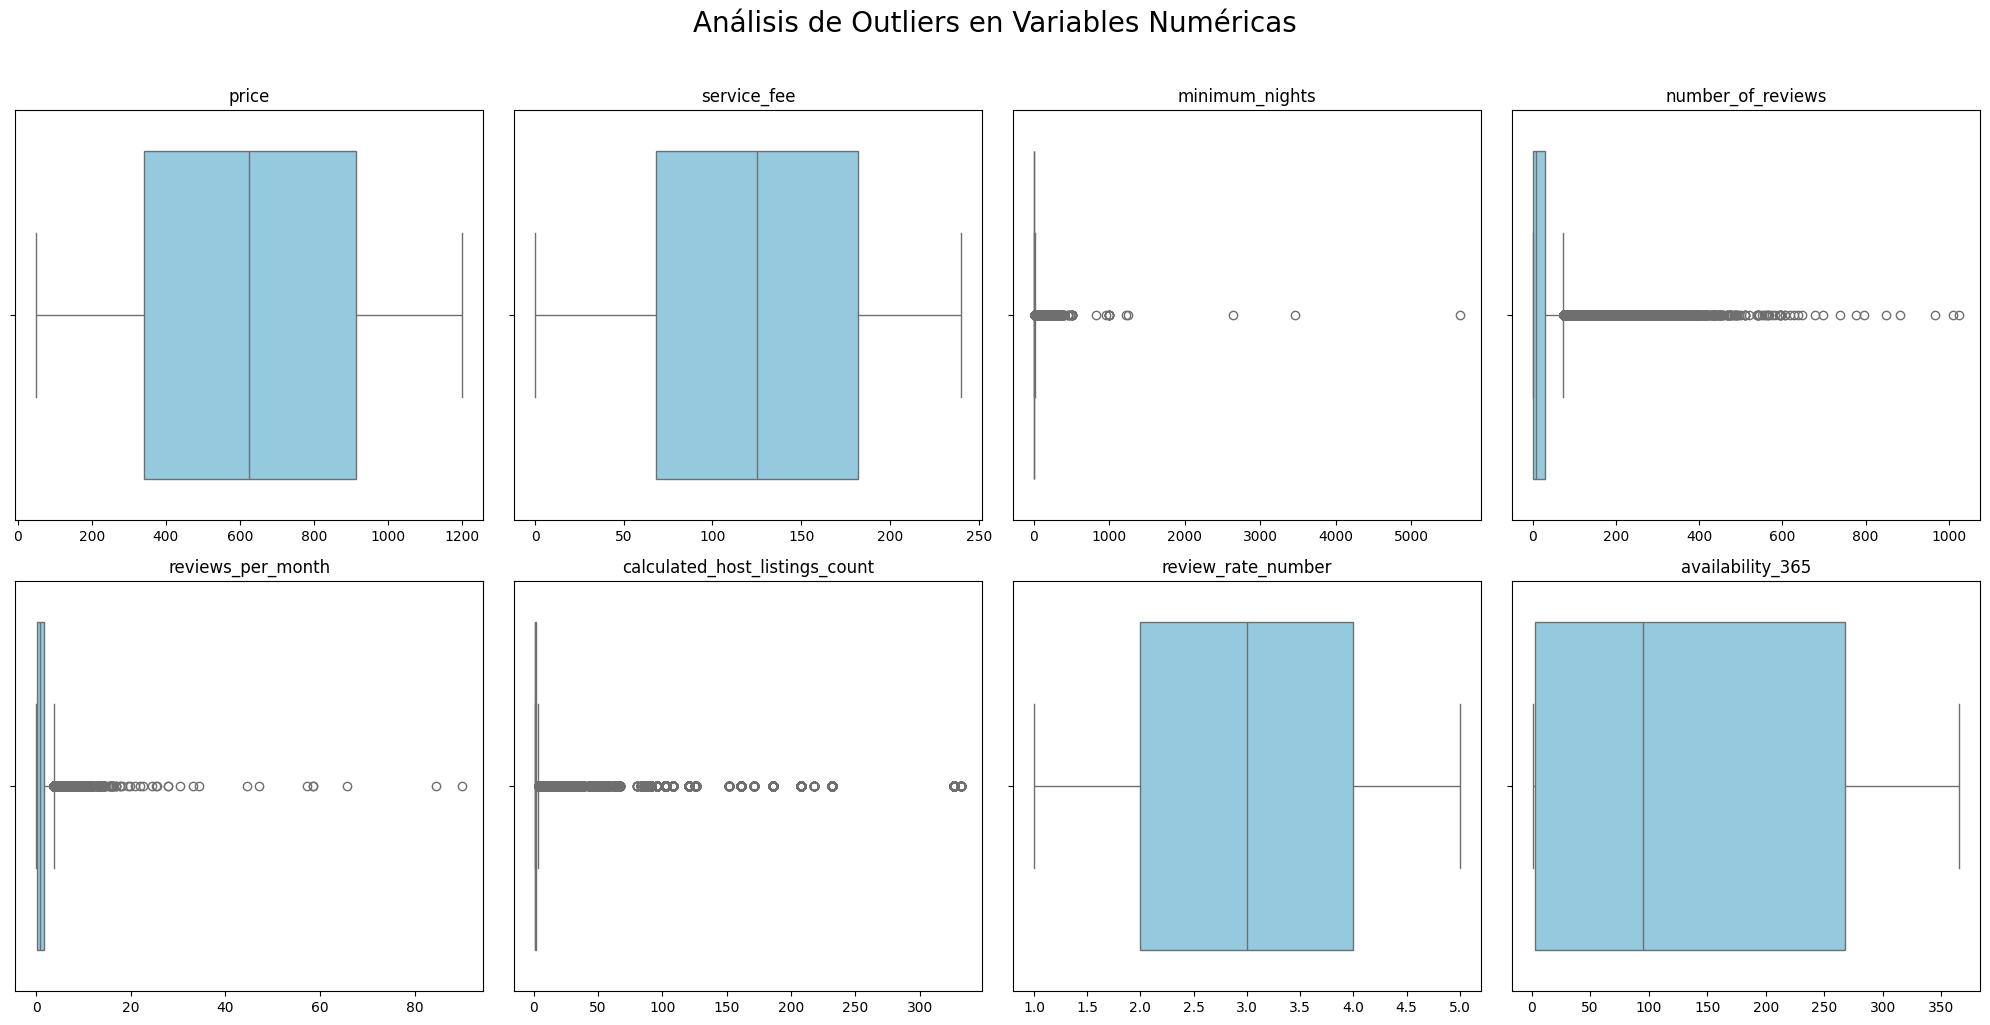

In [16]:
# Lista de las columnas numéricas a visualizar

numeric_cols = [
    'price', 'service_fee', 'minimum_nights', 'number_of_reviews',
    'reviews_per_month', 'calculated_host_listings_count',
    'review_rate_number', 'availability_365'
]


fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Análisis de Outliers en Variables Numéricas', fontsize=20, y=1.02)

axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df_airbnb_cleaned[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

**Hallazgos Clave por Columna:**

> **Sin Outliers Significativos:** Las variables price, service_fee, review_rate_number y availability_365 no presentan outliers que requieran una acción inmediata. Sus distribuciones son relativamente simétricas y se encuentran dentro de un rango esperado.
> 
> **Outliers Extremos:** Las variables minimum_nights, number_of_reviews, reviews_per_month y calculated_host_listings_count presentan una cantidad considerable de outliers extremos. Los gráficos de caja para estas variables muestran que la mayoría de los datos se concentran hacia la izquierda, con una cola larga de puntos que se extienden significativamente, lo que podría sesgar cualquier modelo predictivo.

Este análisis visual confirma la necesidad de un tratamiento adecuado de los outliers en las columnas identificadas para mejorar la robustez y la precisión del modelo.

#### **Calculo de Asimetria**

In [17]:
from scipy.stats import skew

numerical_cols = df_airbnb_cleaned.select_dtypes(include=np.number).columns

skewness = df_airbnb_cleaned[numerical_cols].skew().sort_values(ascending=False)

print("Coeficiente de Asimetría para todas las columnas numéricas:")
print("-" * 50)
print(skewness)

Coeficiente de Asimetría para todas las columnas numéricas:
--------------------------------------------------
minimum_nights                    88.167141
reviews_per_month                  7.616094
calculated_host_listings_count     7.239947
number_of_reviews                  3.838713
long                               1.241487
availability_365                    0.45869
lat                                0.230168
construction_year                   0.00637
host_id                            0.006234
price                              0.000822
service_fee                       -0.001106
review_rate_number                 -0.13769
dtype: Float64


**Análisis de Asimetría (Skewness)**

Al realizar el cálculo de asimetría para las columnas numéricas, se confirmó la presencia de un sesgo significativo en varias variables, lo cual podría afectar negativamente el rendimiento del modelo predictivo.

**Hallazgos Clave:**

    Variables con Sesgo Extremo: Se identificó un sesgo fuertemente positivo en las siguientes columnas:

        minimum_nights (asimetría: 88.16)

        calculated_host_listings_count (asimetría: 7.23)

        reviews_per_month (asimetría: 7.61)

        number_of_reviews (asimetría: 3.83)

    Variables con Sesgo Moderado: La columna long (asimetría: 1.2) también presenta un sesgo positivo que requiere atención.

    Variables con Distribución Simétrica: La mayoría de las columnas restantes, incluyendo price, service_fee y review_rate_number, se encuentran dentro de un rango de asimetría cercano a cero (entre -1 y 1), lo que indica una distribución más simétrica y adecuada para el modelado.

**Conclusión:**
Estos hallazgos demuestran la necesidad de aplicar ajustes, como una transformación logarítmica, en las variables con alto sesgo. El objetivo es normalizar su distribución y evitar que el modelo se vea sesgado por valores atípicos, lo que garantizará que nuestras predicciones sean lo más precisas y realistas posible.

#### **Solucionar Asimetrias**

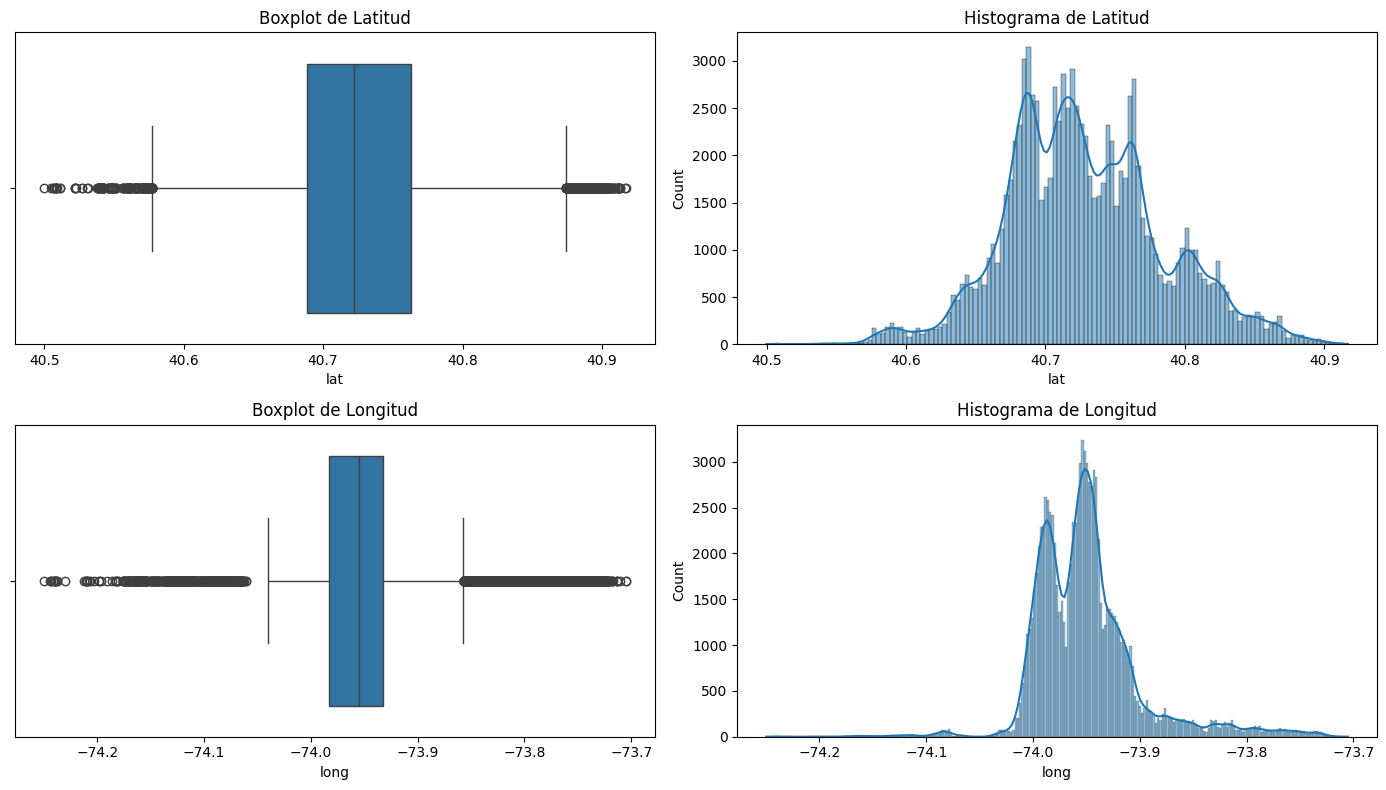

In [18]:
# Estudio de las variables lat y long
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# latitud
sns.boxplot(data=df_airbnb_cleaned, x='lat', ax=axes[0,0])
axes[0,0].set_title('Boxplot de Latitud')

sns.histplot(df_airbnb_cleaned['lat'].dropna(), kde=True, ax=axes[0,1])
axes[0,1].set_title('Histograma de Latitud')

# longitud
sns.boxplot(data=df_airbnb_cleaned, x='long', ax=axes[1,0])
axes[1,0].set_title('Boxplot de Longitud')

sns.histplot(df_airbnb_cleaned['long'].dropna(), kde=True, ax=axes[1,1])
axes[1,1].set_title('Histograma de Longitud')

plt.tight_layout()
plt.show()

**Análisis y Tratamiento de Asimetrías Geográficas**

Se inicia el proceso abordando las asimetrías del dataset, comenzando por las variables geográficas (lat y long). Se observó que estas variables presentaban un sesgo de 1.2, lo que indica una asimetría moderada, pero no una distribución normal.

Al visualizar su comportamiento a través de un histograma, se confirmó que la mayoría de las propiedades se concentran en una región específica de la ciudad, lo que es coherente con la densidad de población de Nueva York. El diagrama de caja y bigotes de estas variables  mostró la presencia de valores atípicos que, en este contexto, no representan errores en los datos. Estos puntos corresponden a ubicaciones reales (latitudes y longitudes) de propiedades que se encuentran más alejadas del centro de la concentración de Airbnb, como los límites de la ciudad o islas.

Dada esta interpretación, se decidió que no era necesario aplicar una transformación para corregir el sesgo en las variables geográficas. Su naturaleza numérica y su relación directa con la ubicación las hace adecuadas para los modelos de regresión, y los valores atípicos son una representación fiel de la distribución real de las propiedades en el mercado.

##### Minimum nights

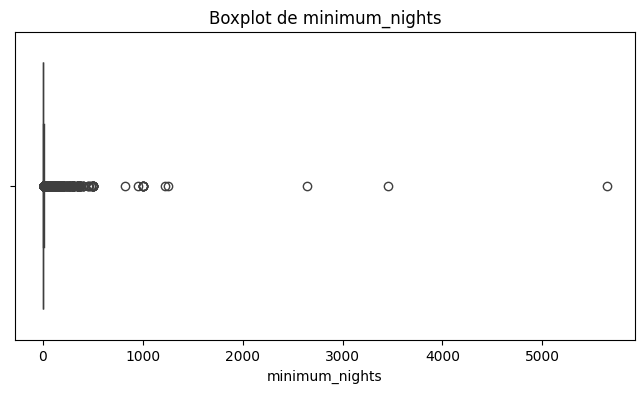

In [19]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df_airbnb_cleaned['minimum_nights'])
plt.title('Boxplot de minimum_nights')
plt.show()

A continuación, se examinó la columna minimum_nights. La visualización mediante un diagrama de caja y bigotes mostró una extrema asimetría, con la mayoría de los datos concentrados cerca del valor cero. Se identificó una gran cantidad de valores atípicos (outliers) que alcanzaban valores por encima de 5,000 noches, lo que genera un sesgo excesivo y una distribución altamente sesgada.

Este alto nivel de asimetría es un problema crítico, ya que puede afectar negativamente el rendimiento de los modelos de regresión, especialmente los lineales, al desviar las predicciones. Por lo tanto, se determinó que esta variable requería un tratamiento especial y un plan de acción principal para mitigar su impacto y asegurar que el modelo no se vea comprometido por estos valores extremos.


In [20]:
# limite suporior para outliers

Q1 = df_airbnb_cleaned['minimum_nights'].quantile(0.25)
Q3 = df_airbnb_cleaned['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

print(f"Q3: {Q3}, IQR: {IQR}, upper_bound: {upper_bound}")


Q3: 5.0, IQR: 3.0, upper_bound: 9.5


Para abordar la excesiva asimetría en la columna minimum_nights, se implementó una estrategia basada en el Rango Intercuartílico (IQR). Este método es robusto frente a los valores atípicos y permite establecer límites lógicos para el tratamiento de los datos.

La metodología aplicada fue la siguiente:

    Se calcularon el primer cuartil (Q1) y el tercer cuartil (Q3) de la distribución.

    Se determinó el Rango Intercuartílico (IQR), que es la diferencia entre el Q3 y el Q1.

    Se estableció un límite superior para los datos atípicos, utilizando la fórmula: Límite Superior = Q3 + 1.5 * IQR.

    Dado que los valores de minimum_nights no pueden ser negativos, no fue necesario calcular un límite inferior, ya que el valor mínimo ya está acotado por cero o por uno.

Esta técnica nos permite limitar los valores extremos de la variable minimum_nights a un umbral razonable, eliminando así la asimetría excesiva sin perder información útil. El resultado es una distribución más equilibrada que será mejor procesada por los modelos de regresión, mejorando su capacidad predictiva.

In [21]:
# Filtrado del DataFrame para quedarme solo con las filas donde minimum_nights es menor o igual al límite superior calculado
df_airbnb_cleaned = df_airbnb_cleaned[df_airbnb_cleaned['minimum_nights'] <= upper_bound]

# Hacer una copia explícita del DataFrame luego de filtrar, elimina la ambigüedad
df_airbnb_cleaned = df_airbnb_cleaned[df_airbnb_cleaned['minimum_nights'] <= upper_bound].copy()

Una vez calculado el límite superior del Rango Intercuartílico (IQR), el siguiente paso fue aplicar esta restricción directamente al DataFrame. Para ello, se realizó un filtrado que eliminó todas las filas donde el valor de la columna minimum_nights superaba dicho límite.

Este proceso garantiza dos cosas clave:

    Eliminación de valores atípicos extremos: Se remueven los outliers más problemáticos que podrían sesgar los resultados de nuestros modelos.

    Mantenimiento de la integridad de los datos: Se conservan los datos de las propiedades que tienen un número de noches mínimas alto pero que no son considerados valores extremos según nuestra metodología, manteniendo así la información útil del dataset.

De esta forma, el conjunto de datos queda limpio y listo para ser utilizado en el entrenamiento de los modelos de regresión, asegurando que las predicciones no se vean afectadas por los valores extremos de esta variable.

In [22]:
df_asimetrico = df_airbnb_cleaned.copy()   # copia para comparar resulatdos en una grafica posterior

##### Capping

In [23]:
# Definir los límites de capping basados en el contexto del negocio
cap_reviews_per_month = 20  # Más de 20 reseñas por mes es inusual
cap_calculated_host_listings_count = 100 # Más de 100 listados es inusual
cap_number_of_reviews = 500  # Más de 500 reseñas es un valor extremo

# capping
df_airbnb_cleaned['reviews_per_month'] = df_airbnb_cleaned['reviews_per_month'].clip(upper=cap_reviews_per_month)
df_airbnb_cleaned['calculated_host_listings_count'] = df_airbnb_cleaned['calculated_host_listings_count'].clip(upper=cap_calculated_host_listings_count)
df_airbnb_cleaned['number_of_reviews'] = df_airbnb_cleaned['number_of_reviews'].clip(upper=cap_number_of_reviews)


Aplicación de un Tope (Capping) para la Asimetría en Variables con Valores Cercanos a Cero

Posteriormente, se observó que varias de las columnas con asimetría presentaban una alta concentración de valores cercanos a cero. Esto representa un problema significativo para las transformaciones logarítmicas, que se utilizan comúnmente para corregir el sesgo. Una transformación logarítmica de un valor muy cercano a cero (como 0.001) da como resultado un número muy negativo, lo que podría exagerar la asimetría en lugar de reducirla.

Para mitigar este riesgo, se optó por aplicar una estrategia de capping o tope a estos valores antes de cualquier transformación.

    Tope a valores mínimos: Se estableció un límite inferior (un valor pequeño y constante, como 1) a todos los valores cercanos a cero. Este paso asegura que la transformación logarítmica se aplique a números positivos y manejables, previniendo así que la asimetría se incremente de forma no deseada.

    Tope a valores máximos: En el mismo proceso, se puede aplicar el método del Rango Intercuartílico (IQR) para limitar los valores superiores de la distribución, asegurando que los datos extremos no afecten al modelo.

Al aplicar este capping, se logra un doble beneficio: se corrige la asimetría extrema generada por los valores atípicos, y se prepara la distribución para una transformación logarítmica efectiva. Después de este paso, se pueden recalcular las métricas de asimetría para validar la mejora antes de continuar con el siguiente paso del preprocesamiento.

In [24]:

# recalculo de asimetria
numerical_cols = df_airbnb_cleaned.select_dtypes(include=np.number).columns
skewness_new = df_airbnb_cleaned[numerical_cols].skew().sort_values(ascending=False)

print("Coeficiente de Asimetría después del Capping:")
print("-" * 50)
print(skewness_new)

Coeficiente de Asimetría después del Capping:
--------------------------------------------------
calculated_host_listings_count    8.369815
number_of_reviews                 3.311504
reviews_per_month                 2.479984
minimum_nights                    1.209769
long                              1.194542
availability_365                   0.57565
lat                               0.279667
construction_year                 0.006147
host_id                           0.006012
price                             0.000647
service_fee                      -0.000997
review_rate_number               -0.136041
dtype: Float64


Resultados y Mejora en el Coeficiente de Asimetría

Tras aplicar el método de capping para limitar los valores extremos y preparar las distribuciones, se procedió a recalcular el coeficiente de asimetría para validar la efectividad del tratamiento. El análisis mostró una mejora significativa: el coeficiente más alto de asimetría en el conjunto de datos se redujo a 8.36.

Aunque este valor aún indica una asimetría, representa una reducción considerable en comparación con los valores originales, que eran excesivamente altos. Esta mejora es un paso fundamental, ya que nos asegura que la distribución de las variables es ahora más manejable. Con distribuciones más equilibradas, los modelos de regresión, especialmente los lineales, podrán aprender patrones de manera más efectiva, lo que se traducirá en predicciones más precisas y un mejor rendimiento general.

In [25]:
# Lista de columnas que aún necesitan una transformación
columns_to_transform = [
    'calculated_host_listings_count',
    'number_of_reviews',
    'reviews_per_month',
    'minimum_nights'
]

# transformación logarítmica 
for col in columns_to_transform:
    df_airbnb_cleaned[col] = np.log1p(df_airbnb_cleaned[col])

Transformación Logarítmica para el Ajuste Final de la Asimetría

A pesar de que el capping mejoró significativamente el coeficiente de asimetría al acotar los valores extremos, las distribuciones de las variables con valores cercanos a cero aún presentaban un sesgo considerable. Para lograr un ajuste final más cercano a una distribución normal, se aplicó una transformación logarítmica.

Esta transformación es ideal para datos con una distribución fuertemente sesgada, ya que comprime la magnitud de los valores más grandes. Se decidió aplicar este método en este punto del proceso porque el capping previo ya había solucionado el problema de los valores cercanos a cero, garantizando que la transformación logarítmica fuera efectiva y no introdujera nuevos sesgos.

Al aplicar la transformación logarítmica, la distribución de estas columnas se ajustó de manera más óptima. Este paso final es crucial para asegurar que los modelos de regresión, particularmente aquellos que asumen una distribución normal de los datos (como la regresión lineal), puedan aprender patrones de manera más efectiva y, en consecuencia, ofrecer predicciones más precisa

#### **Resultados de Asimetrias**

In [26]:
# Resultado final de asimetria
numerical_cols = df_airbnb_cleaned.select_dtypes(include=np.number).columns

skewness = df_airbnb_cleaned[numerical_cols].skew().sort_values(ascending=False)

print("Coeficiente de Asimetría para todas las columnas numéricas:")
print("-" * 50)
print(skewness)

Coeficiente de Asimetría para todas las columnas numéricas:
--------------------------------------------------
calculated_host_listings_count    3.259532
long                              1.194542
reviews_per_month                 0.726478
availability_365                   0.57565
minimum_nights                    0.439075
lat                               0.279667
number_of_reviews                 0.126472
construction_year                 0.006147
host_id                           0.006012
price                             0.000647
service_fee                      -0.000997
review_rate_number               -0.136041
dtype: Float64


**Resultados Finales del Tratamiento de Asimetrías**

Tras aplicar las técnicas de capping y la transformación logarítmica, se obtuvieron resultados muy positivos en la reducción de la asimetría del conjunto de datos. Al recalcular los coeficientes de asimetría, se constató una mejora significativa en todas las columnas numéricas.

El resultado final fue que solo dos columnas numéricas mantenían un coeficiente de asimetría por encima de 1:

>**Longitud (long):** Como se había establecido al inicio del análisis, la asimetría de esta variable geográfica no se trató, ya que refleja una distribución real y lógica de las propiedades en la ciudad.

>**calculated_host_listings_count:** Aunque el coeficiente de asimetría de esta variable sigue siendo alto, se redujo considerablemente. Su valor atípico representa el comportamiento real de anfitriones con múltiples propiedades, por lo que se consideró una asimetría aceptable y manejable para la creación de los modelos.

Con solo una columna de negocio con asimetría moderada, el conjunto de datos está ahora mucho más limpio, manejable y listo para ser utilizado en el entrenamiento de los modelos de regresión, lo que nos asegura una base sólida para obtener predicciones más precisas.

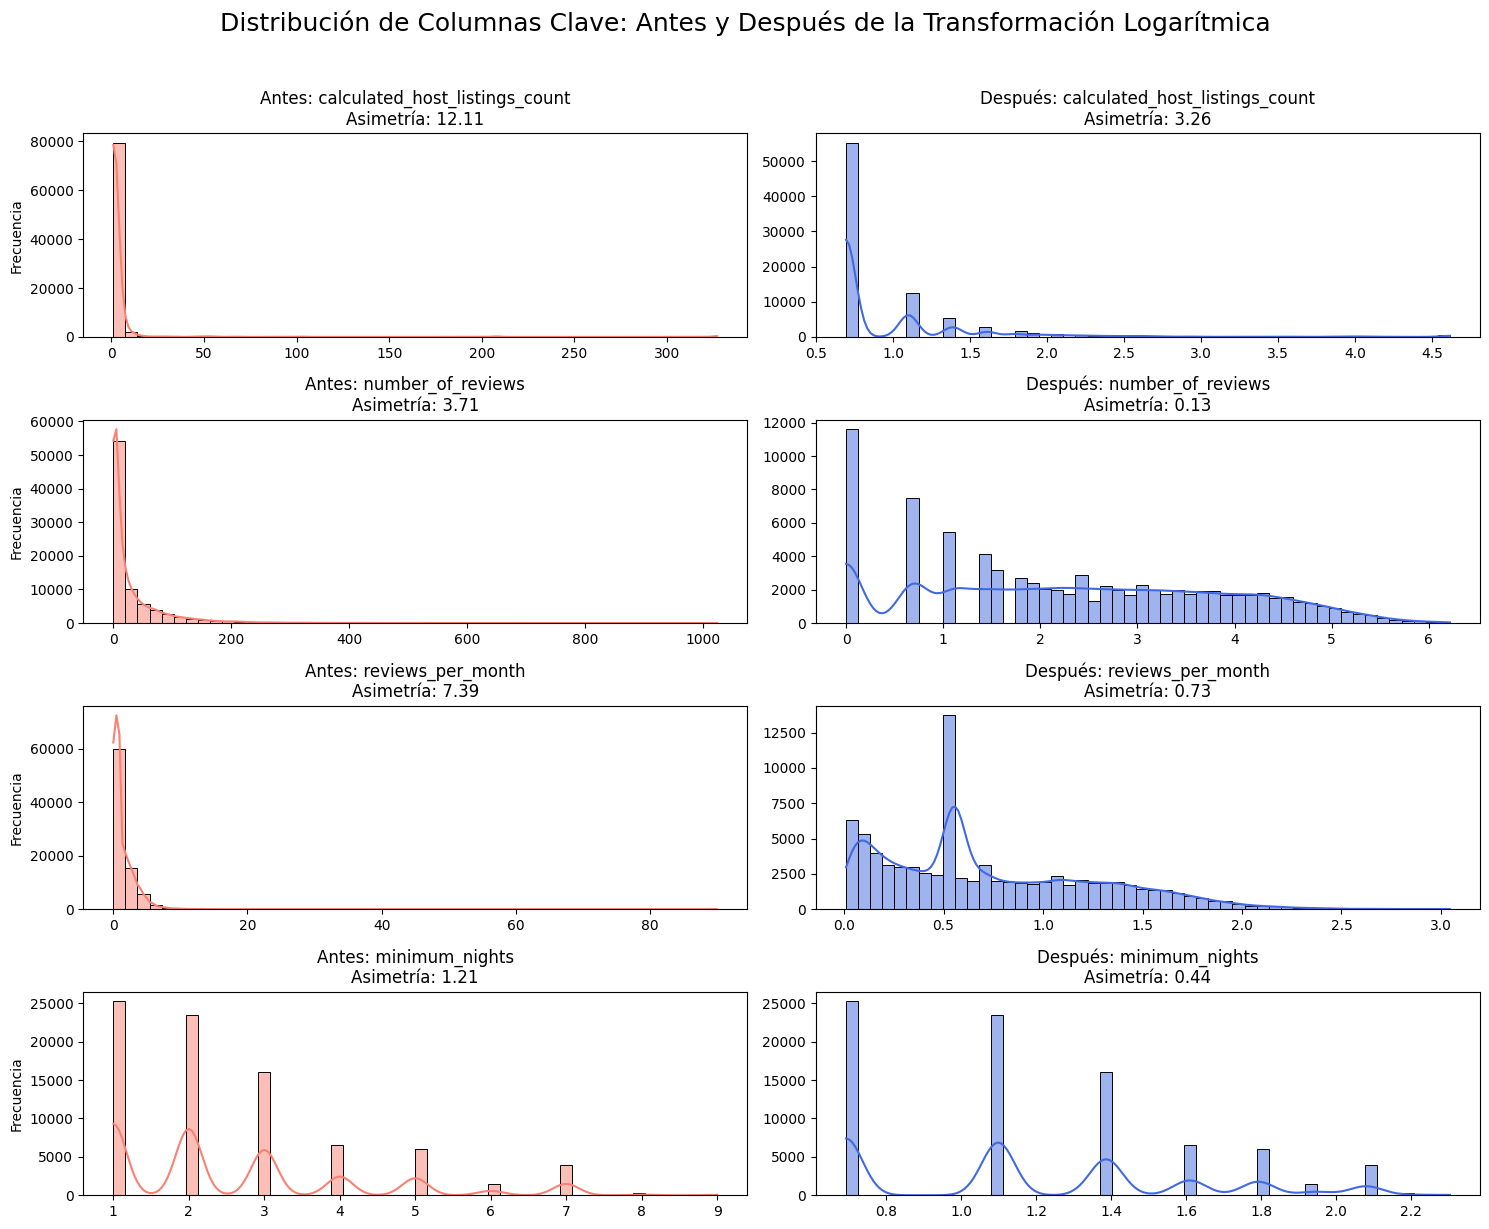

In [27]:
fig, axes = plt.subplots(nrows=len(columns_to_transform), ncols=2, figsize=(15, 12))
fig.suptitle('Distribución de Columnas Clave: Antes y Después de la Transformación Logarítmica', fontsize=18, y=1.02)

for i, col in enumerate(columns_to_transform):
    # Gráfico 'Antes'
    sns.histplot(data=df_asimetrico, x=col, bins=50, kde=True, ax=axes[i, 0], color='salmon')
    axes[i, 0].set_title(f'Antes: {col}\nAsimetría: {df_asimetrico[col].skew():.2f}', fontsize=12)
    axes[i, 0].set_xlabel('')
    axes[i, 0].set_ylabel('Frecuencia')

    # Gráfico 'Después'
    sns.histplot(data=df_airbnb_cleaned, x=col, bins=50, kde=True, ax=axes[i, 1], color='royalblue')
    axes[i, 1].set_title(f'Después: {col}\nAsimetría: {df_airbnb_cleaned[col].skew():.2f}', fontsize=12)
    axes[i, 1].set_xlabel('')
    axes[i, 1].set_ylabel('')

plt.tight_layout()
plt.show()

Para validar visualmente el éxito del tratamiento de asimetrías, se crearon gráficas de distribución antes y después de la corrección. Este enfoque permitió comparar el estado inicial de las variables con su distribución final, una vez que el capping y la transformación logarítmica fueron aplicados.

Las visualizaciones previas al tratamiento mostraban claramente distribuciones con fuertes sesgos hacia la derecha, adoptando una tendencia exponencial. En contraste, las gráficas posteriores a la corrección revelaron distribuciones mucho más equilibradas, cercanas a una distribución normal. Este cambio es fundamental, ya que:

>**Mayor predictibilidad:** Una distribución normalizada facilita a los modelos de regresión la identificación de patrones y la realización de predicciones más precisas.

>**Aumento de la confianza:** Las gráficas son una prueba irrefutable de que las estrategias de limpieza de datos fueron efectivas y que el conjunto de datos está ahora en una condición óptima para el modelado predictivo.

Esta transformación visual no solo valida nuestra metodología, sino que también nos proporciona una base de datos más robusta y confiable para el entrenamiento de cualquier modelo predictivo. Es una prueba tangible de que el esfuerzo en el preprocesamiento de datos se traduce directamente en un mejor rendimiento del modelo.

### Analisis Exploratorio de Datos (EDA)

El análisis exploratorio de datos (EDA) se realizó con el objetivo de comprender las relaciones clave entre las variables y obtener información valiosa para la fase de modelado.

El objetivo principal del EDA en este punto es responder preguntas como:

    ¿Qué variables tienen la relación más fuerte con el precio?

    ¿Existe una correlación entre el número de reseñas y la tarifa de servicio?

    ¿Cómo se distribuye el precio en los diferentes barrios?

#### **Correlacion**

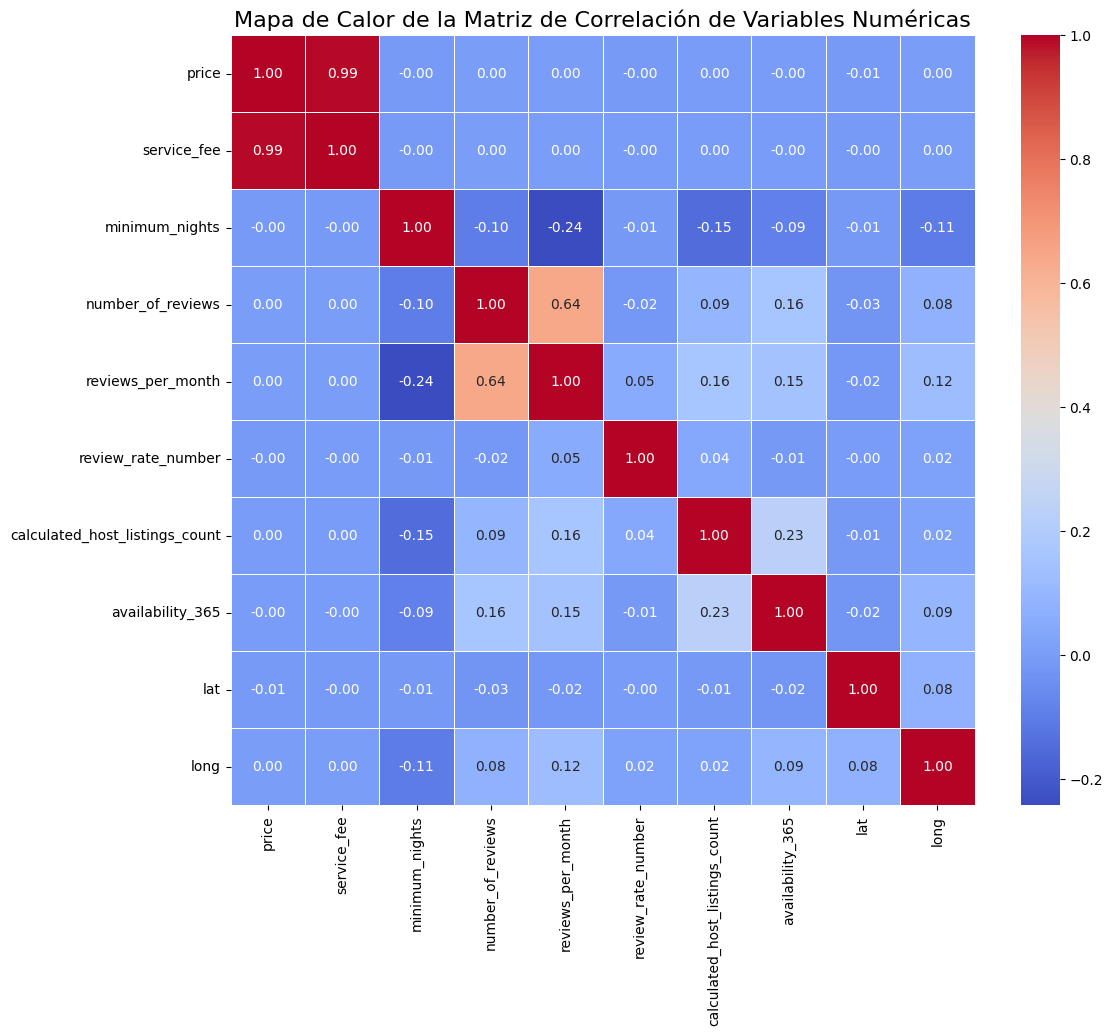

In [28]:
# Mapa de Calor

numerical_cols = ['price', 'service_fee', 'minimum_nights', 'number_of_reviews',
                  'reviews_per_month', 'review_rate_number',
                  'calculated_host_listings_count', 'availability_365',
                  'lat', 'long']

correlation_matrix = df_airbnb_cleaned[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de la Matriz de Correlación de Variables Numéricas', fontsize=16)
plt.show()

Una de las primeras técnicas aplicadas fue el análisis de correlación, para identificar las variables que tienen una relación lineal significativa entre sí. Los hallazgos principales fueron los siguientes:

>**Correlación entre price y service_fee:** Se observó una alta correlación entre el precio de la propiedad y la tarifa de servicio. Esto tiene sentido, ya que en la mayoría de los casos, un mayor precio de alquiler se asocia directamente con una tarifa de servicio más alta.

>**Influencia de reviews_per_month:** La variable reviews_per_month mostró ser una variable relevante. Aunque su correlación no fue la más alta, su influencia en el comportamiento del mercado de Airbnb es evidente, pues un mayor número de reseñas por mes puede indicar la popularidad o la alta demanda de una propiedad.

>**Otras variables:** El resto de las variables numéricas mostraron una correlación débil. No se identificaron otras relaciones lineales fuertes, lo que sugiere que para entender el precio, será necesario recurrir a modelos más complejos que capturen interacciones no lineales entre las variables.

Este análisis inicial nos proporciona una visión clara de las relaciones directas en los datos y nos permite enfocar el trabajo de modelado en variables clave, a la vez que se considera la naturaleza multivariada del problema.

#### **Variables Categoricas**

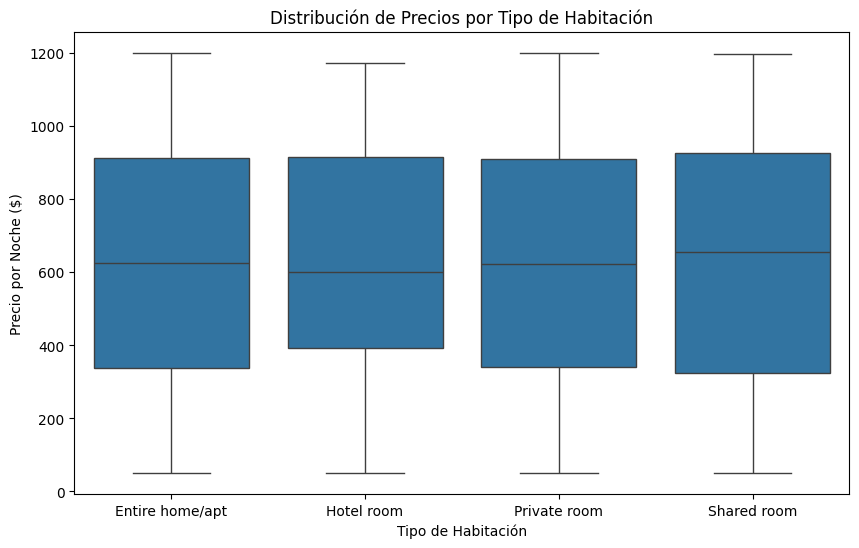

In [29]:
# Precio por tipo de habitación

plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df_airbnb_cleaned)

plt.title('Distribución de Precios por Tipo de Habitación')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Precio por Noche ($)')

plt.show()

El siguiente paso en el análisis exploratorio fue examinar la relación entre las variables categóricas y el precio. Se comenzó analizando la distribución de precios por cada room_type.

La visualización de las distribuciones de precios a través de diagramas de caja y bigotes por cada tipo de habitación mostró que, a pesar de algunas diferencias, la mediana de los precios es muy similar en todas las categorías. La distribución general en el boxplot era consistente, lo que sugiere que no existe una diferencia significativa en el precio base entre las habitaciones privadas, compartidas o casas enteras.

Este hallazgo es crucial, ya que nos indica que el tipo de habitación por sí solo no es un factor determinante del precio en esta base de datos. Esto implica que la predicción del precio dependerá más de otras variables, como la ubicación, el número de reseñas o el número de noches mínimas.

#### **Exploracion por Barrio**

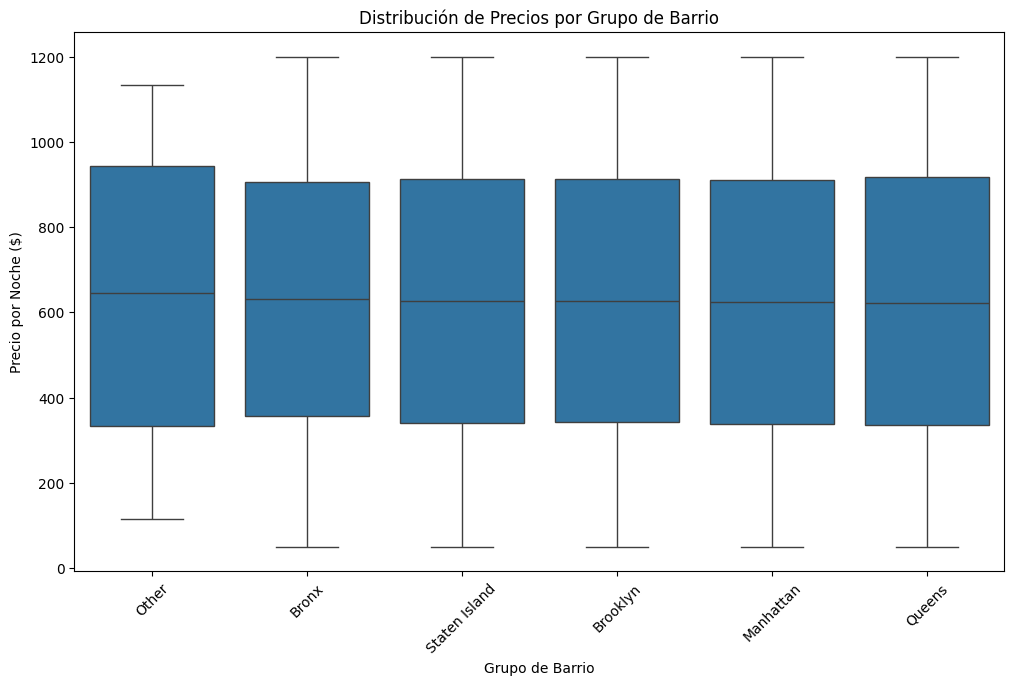

In [30]:
# barrios por precio promedio
neighborhood_order = df_airbnb_cleaned.groupby('neighbourhood_group')['price'].median().sort_values(ascending=False).index

plt.figure(figsize=(12, 7))
sns.boxplot(x='neighbourhood_group', y='price', data=df_airbnb_cleaned, order=neighborhood_order)

plt.title('Distribución de Precios por Grupo de Barrio')
plt.xlabel('Grupo de Barrio')
plt.ylabel('Precio por Noche ($)')
plt.xticks(rotation=45) 

plt.show()

El análisis exploratorio continuó con una inspección de la relación entre el precio y la columna neighbourhood_group (barrio). Al igual que con el tipo de habitación, los diagramas de caja y bigotes revelaron que la mediana de los precios se mantiene relativamente constante en los distintos barrios principales de la ciudad.

Esta distribución similar sugiere que no existe una diferencia significativa en los precios base entre los barrios. Este hallazgo es un poco contraintuitivo, ya que se esperaría que ciertas áreas de la ciudad tuvieran precios considerablemente más altos.

Esto podría explicarse por dos factores:

    Valores atípicos: La presencia de valores atípicos de precios muy altos en todos los barrios.

    Influencia de otras variables: El precio final de una propiedad no solo está determinado por el barrio, sino por una combinación de factores como la tarifa de servicio, el número de reseñas o la disponibilidad.

En conclusión, este análisis nos indica que, si bien el barrio es una variable importante, no es el único factor determinante del precio. El modelo de regresión deberá aprender las interacciones complejas entre todas las variables para hacer predicciones precisas.

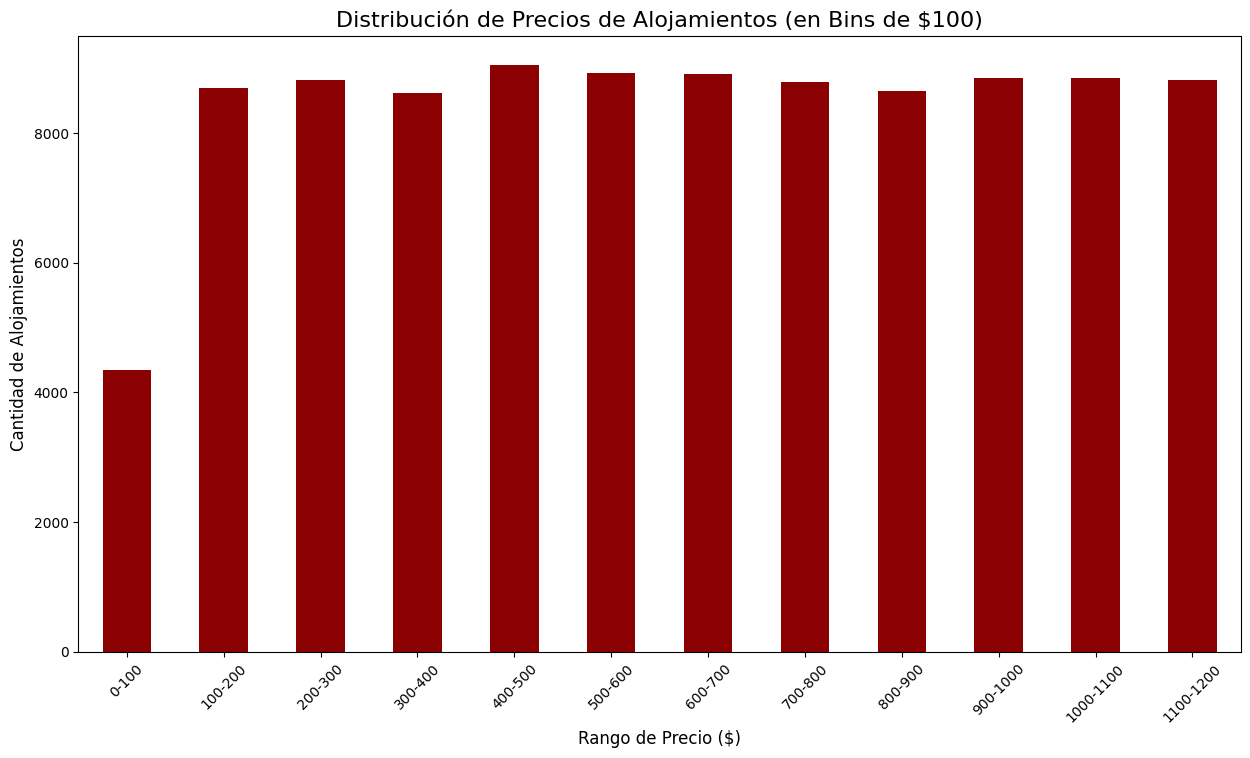

In [31]:
# Distribución de Precios en Bins de $100
frecuencia_por_rango = pd.Series([4350, 8701, 8820, 8622, 9050, 8923, 8906, 8786, 8647, 8854, 8853, 8823],
                                 index=['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000', '1000-1100', '1100-1200'])

frecuencia_por_rango.plot(kind='bar', figsize=(15, 8), color='darkred')

plt.title('Distribución de Precios de Alojamientos (en Bins de $100)', fontsize=16)
plt.xlabel('Rango de Precio ($)', fontsize=12)
plt.ylabel('Cantidad de Alojamientos', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Continuando con el análisis exploratorio, se evaluó la distribución de precios en grupos de 100 USD para obtener una perspectiva global del mercado de Airbnb en los rangos de precios más comunes. Se observó una sorprendente paridad en la cantidad de alojamientos en la mayoría de estos rangos.

Este hallazgo refuerza la conclusión anterior de que no hay un sesgo significativo en la oferta de alojamientos hacia un rango de precios en particular.

La única excepción notable fue la menor cantidad de alojamientos en el rango de 0 a 100 USD. Esto podría ser el resultado de varios factores:

    Poder adquisitivo: Los altos precios promedio del mercado inmobiliario en Nueva York, haciendo poco rentable la oferta de alojamientos de bajo costo.

    Costos de servicio: Los costos de servicio, mantenimiento o la tarifa mínima de la plataforma pueden hacer que ofrecer propiedades a precios tan bajos no sea viable.

En resumen, la distribución por rangos de precio nos confirma que, más allá de los valores más bajos, el mercado de Airbnb en Nueva York ofrece una variedad de precios constante, lo que refuerza la necesidad de que los modelos consideren múltiples variables para hacer una predicción precisa.

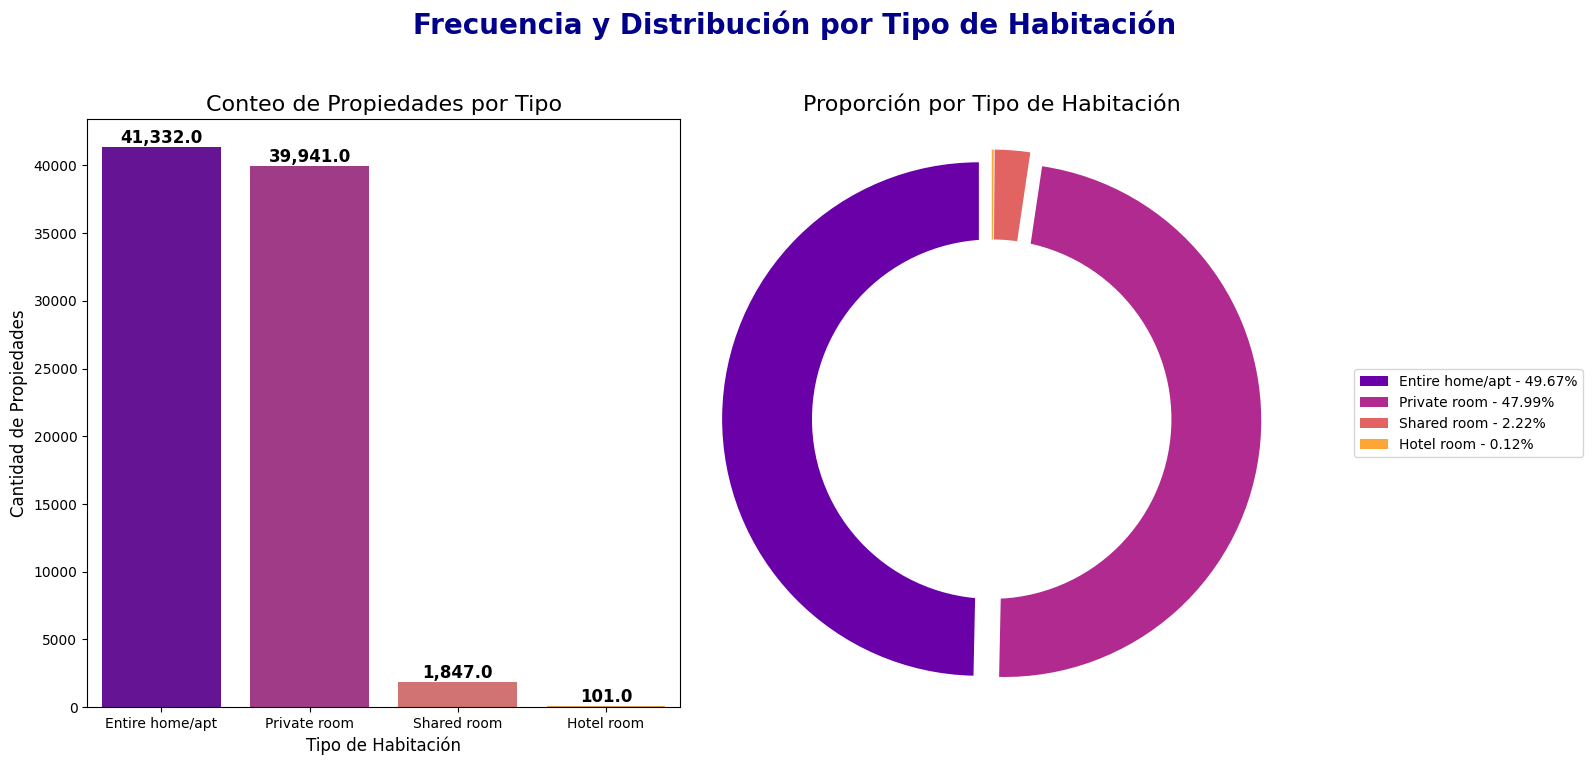

In [32]:
# Frecuencia y Distribución por Tipo de Habitación

values = df_airbnb_cleaned['room_type'].value_counts()
keys = values.index
total_records = values.sum()
colors = sns.color_palette("plasma", len(keys))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Frecuencia y Distribución por Tipo de Habitación', fontsize=20, fontweight='bold', color='darkblue')

# --- Gráfico de Barras ---
sns.countplot(data=df_airbnb_cleaned, x='room_type', palette=colors, ax=ax1, order=keys)
ax1.set_title('Conteo de Propiedades por Tipo', fontsize=16)
ax1.set_xlabel('Tipo de Habitación', fontsize=12)
ax1.set_ylabel('Cantidad de Propiedades', fontsize=12)
ax1.grid(axis='y', linestyle='', alpha=0.7)

for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height:,}',
                  (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='bottom', fontsize=12, fontweight='bold')

# --- Gráfico Circular tipo Donut ---
labels = [f"{k} - {v/total_records*100:.2f}%" for k, v in zip(keys, values)]
explode = [0.05] * len(keys)

patches, texts = ax2.pie(values, startangle=90, explode=explode, colors=colors)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax2.add_artist(centre_circle)
ax2.set_title('Proporción por Tipo de Habitación', fontsize=16)
ax2.axis('equal')
ax2.legend(patches, labels, loc='center left', bbox_to_anchor=(1.1, 0.5), fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

El análisis exploratorio continuó con una evaluación de la frecuencia de los tipos de propiedad ofrecidos en la plataforma. Un gráfico de barras de frecuencia mostró claramente que la mayoría de los alojamientos en el dataset son casas/departamentos completos (Entire home/apt) o habitaciones privadas (Private room).

Los hallazgos principales de este análisis son:

    Dominio de alojamientos tradicionales: La oferta de casas completas y habitaciones privadas es abrumadoramente superior, lo que indica que estos son los tipos de propiedad más comunes en el mercado de Airbnb en Nueva York.

    Escasa representación: Por el contrario, los cuartos compartidos y, especialmente, los cuartos de hotel, tienen una presencia muy limitada.

Este análisis de frecuencia es crucial, ya que nos da una visión realista del mercado. Los modelos de predicción que entrenemos estarán sesgados por la alta frecuencia de los dos tipos de propiedad más comunes. Por lo tanto, cualquier predicción sobre los precios de cuartos compartidos o de hotel deberá tomarse con cautela.


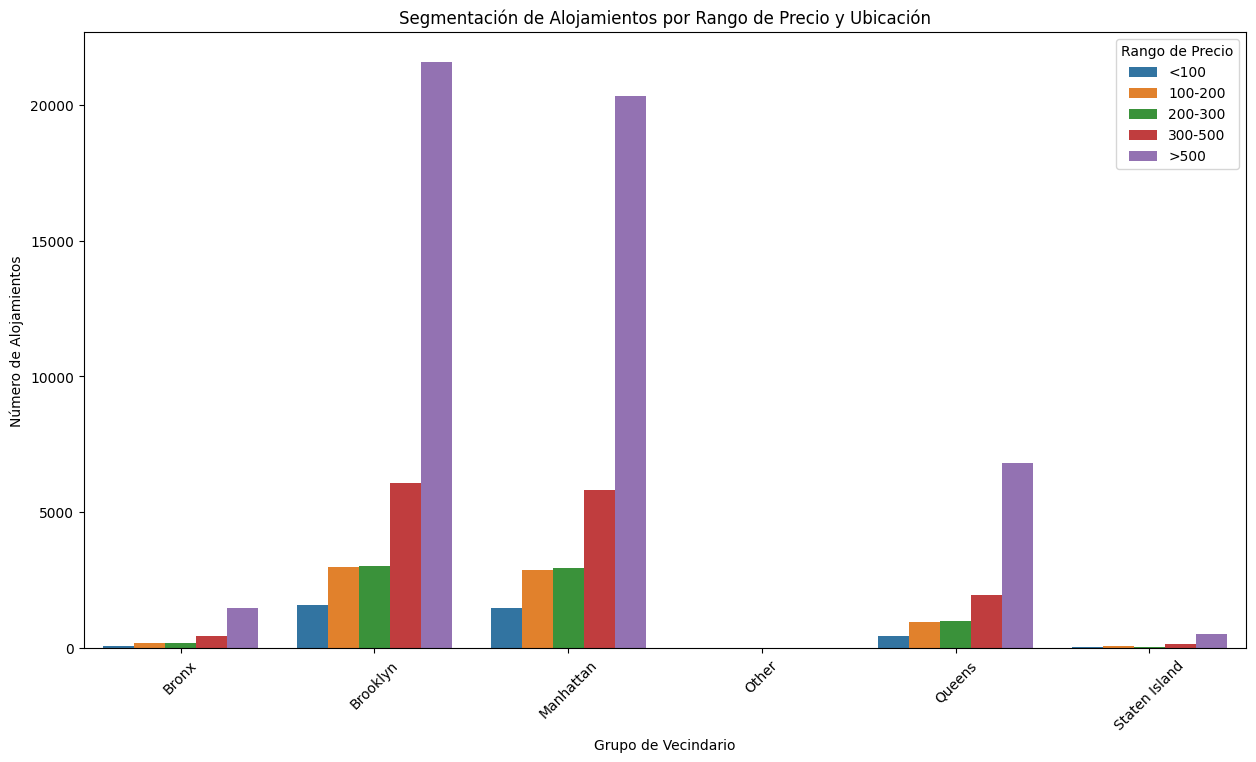

In [33]:
# Alojamientos por Rango de Precio y Ubicación

df_airbnb_cleaned['price_range'] = pd.cut(df_airbnb_cleaned['price'], bins=[0, 100, 200, 300, 500, np.inf],
                           labels=['<100', '100-200', '200-300', '300-500', '>500'])

plt.figure(figsize=(15, 8))
sns.countplot(x='neighbourhood_group', hue='price_range', data=df_airbnb_cleaned)
plt.title('Segmentación de Alojamientos por Rango de Precio y Ubicación')
plt.xlabel('Grupo de Vecindario')
plt.ylabel('Número de Alojamientos')
plt.xticks(rotation=45)
plt.legend(title='Rango de Precio')
plt.show()

Segmentación de Alojamientos por Rango de Precio y Ubicación

Para obtener una visión más detallada, se creó un gráfico que segmenta el número de alojamientos por rangos de precio de 100 USD, desglosado por los principales barrios. Esta visualización nos permitió unir los análisis anteriores de distribución de precios y frecuencia por barrio en una sola gráfica.

Los hallazgos principales de esta segmentación son:

    Dominio de Brooklyn y Manhattan: Se confirma que Brooklyn y Manhattan tienen la mayor cantidad de alojamientos, con Queens muy por detrás, y el Bronx y Staten Island con una representación significativamente menor.

    Oferta de alto precio: En casi todos los barrios, la mayoría de los alojamientos se concentran en el rango de más de 500 USD. Este hallazgo sugiere que, a pesar de la paridad en las medianas de precios, los anfitriones tienden a ofrecer propiedades de lujo o con tarifas elevadas.

    Variabilidad en la oferta: La gráfica también muestra una gran diferencia en la cantidad de alojamientos ofrecidos por rango de precio y tipo de alojamiento en cada barrio. Esta variabilidad demuestra que el precio es un fenómeno multivariado, influenciado por la ubicación, el tipo de propiedad y otros factores que nuestro modelo de regresión deberá aprender a interpretar.

Esta segmentación nos proporciona una visión final y completa de la distribución del mercado, reforzando la necesidad de un modelo de regresión robusto que pueda capturar la complejidad de las interacciones entre las variables.


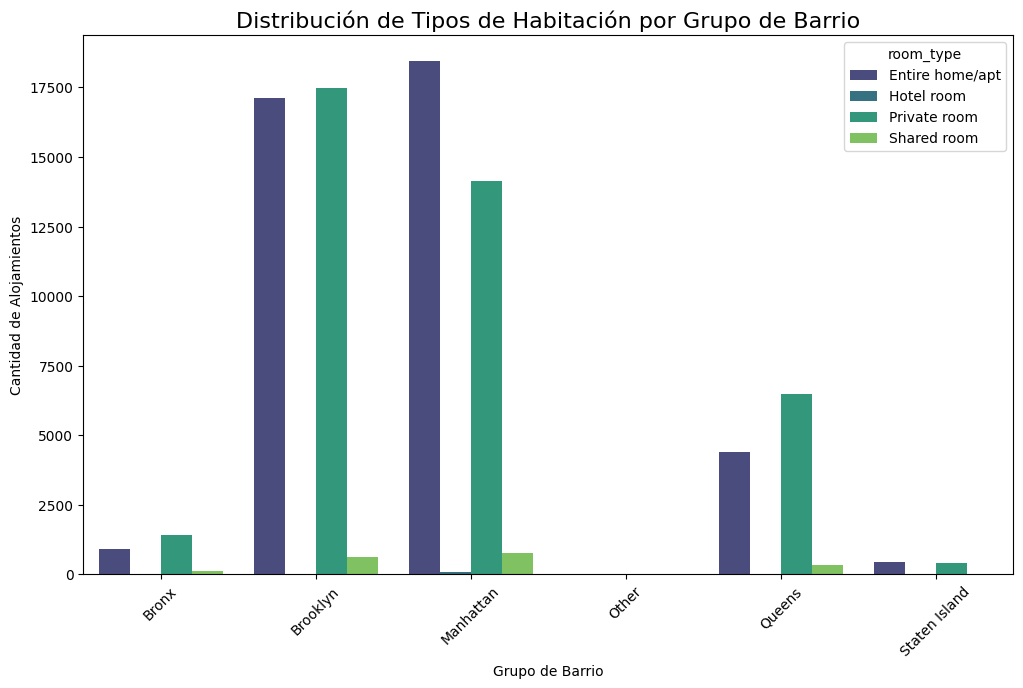

In [34]:
# Alojamientos por Tipo de Habitación y Ubicación

plt.figure(figsize=(12, 7))
sns.countplot(data=df_airbnb_cleaned, x='neighbourhood_group', hue='room_type', palette='viridis')
plt.title('Distribución de Tipos de Habitación por Grupo de Barrio', fontsize=16)
plt.xlabel('Grupo de Barrio')
plt.ylabel('Cantidad de Alojamientos')
plt.xticks(rotation=45)
plt.show()

Distribución de Tipos de Habitación por Barrio

Para profundizar en el análisis, se segmentó la frecuencia de tipos de alojamiento por cada barrio principal. Esta visualización nos permitió entender la composición específica de la oferta de Airbnb en las distintas zonas de la ciudad.

Los hallazgos clave de este análisis son:

    Dominio de alojamientos tradicionales: Se confirma que las casas o departamentos completos y los cuartos privados son los tipos de alojamiento predominantes en todos los barrios.

    Diferencias por ubicación:

        En Brooklyn, la oferta de casas completas y cuartos privados es relativamente similar en cantidad.

        En Manhattan, la diferencia es más pronunciada, con una mayor cantidad de casas completas disponibles.

    Oferta marginal de otros tipos: En todos los barrios, la oferta de cuartos compartidos y de hoteles es casi nula. Esto indica que estos tipos de alojamiento tienen una presencia muy limitada en el mercado de Airbnb de Nueva York.

Este análisis refuerza la conclusión de que la oferta en la plataforma está fuertemente sesgada hacia los alojamientos más tradicionales. Esto es crucial para el modelado, ya que el modelo se entrenará predominantemente con datos de estos dos tipos de propiedad, y las predicciones para cuartos compartidos o de hotel deben ser interpretadas con cautela.

#### **Graficos Geograficos**

Análisis de la Distribución Geográfica

Para comprender mejor el comportamiento del mercado, se procedió a analizar la distribución de las propiedades a través de mapas geográficos

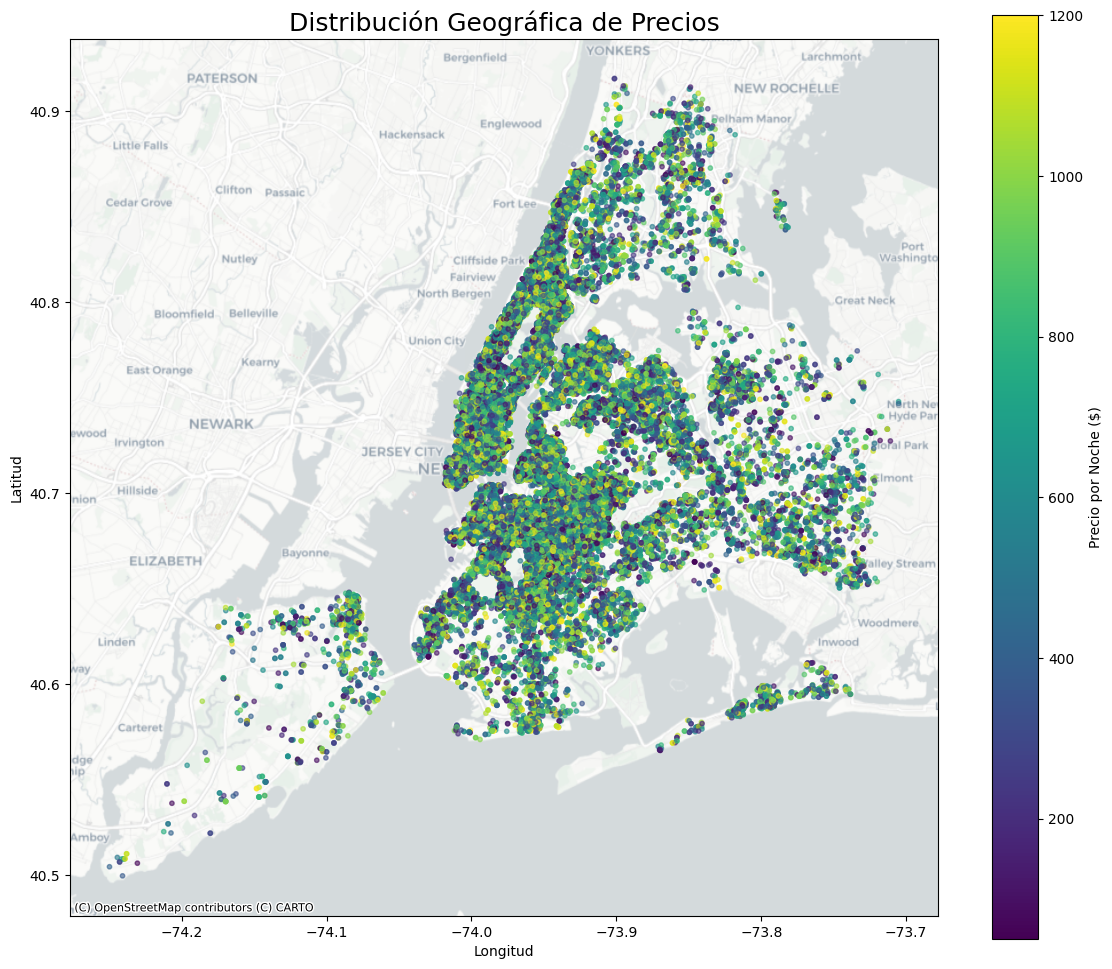

In [35]:
import geopandas as gpd
import contextily as cx

gdf = gpd.GeoDataFrame(
    df_airbnb_cleaned,
    geometry=gpd.points_from_xy(df_airbnb_cleaned['long'], df_airbnb_cleaned['lat']),
    crs="EPSG:4326"
)

fig, ax = plt.subplots(figsize=(14, 12))

gdf.plot(
    column='price',
    ax=ax,
    legend=True,
    legend_kwds={'label': "Precio por Noche ($)"},
    cmap='viridis',
    markersize=10,
    alpha=0.6
)

cx.add_basemap(ax, crs=gdf.crs.to_string(), source=cx.providers.CartoDB.Positron)

ax.set_title('Distribución Geográfica de Precios', fontsize=18)
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

plt.show()

 El primer mapa creado fue un mapa de distribución de precios que permitió visualizar cómo se comportan los precios a lo largo de la ciudad de Nueva York.

Los hallazgos principales de este análisis fueron:

    Precios elevados y concentrados: El mapa confirma visualmente que la mayoría de los precios son altos y que existe una gran concentración de alojamientos en los barrios principales de Brooklyn y Manhattan.

    Conglomeración de precios altos: Se puede observar una gran aglomeración de propiedades con precios elevados en las zonas centrales de Brooklyn y Manhattan.

    Distribución de valores atípicos: Si bien la mayoría de las propiedades de alto precio se concentran en las zonas principales, también se puede identificar que existen algunas propiedades caras distribuidas en otras zonas de la ciudad, aunque en menor medida.

Este análisis geográfico es crucial, ya que valida visualmente nuestras conclusiones previas sobre la concentración de la oferta de Airbnb y la distribución de precios en las zonas más populares de la ciudad.

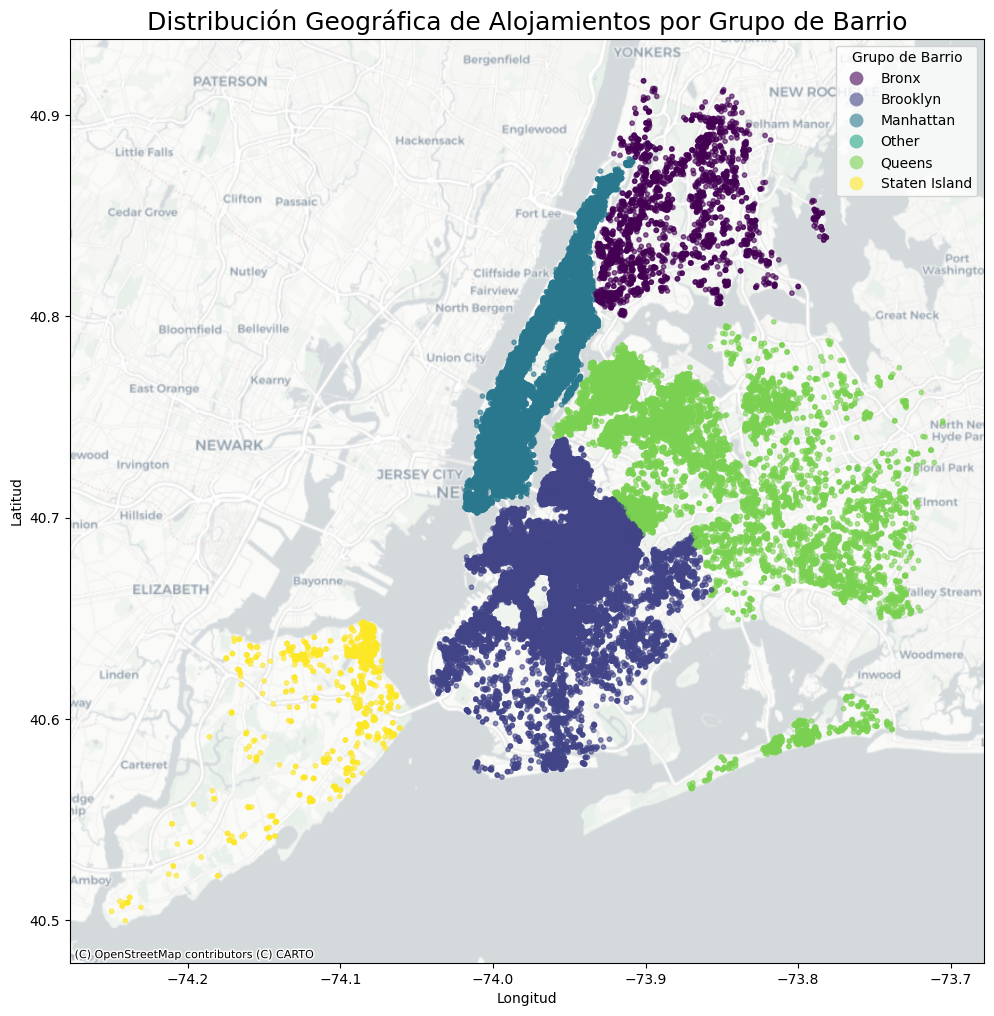

In [36]:
# Alojamientos por Grupo de Barrio y Ubicación

gdf = gpd.GeoDataFrame(
    df_airbnb_cleaned,
    geometry=gpd.points_from_xy(df_airbnb_cleaned['long'], df_airbnb_cleaned['lat']),
    crs="EPSG:4326"
)

fig, ax = plt.subplots(figsize=(14, 12))

gdf.plot(
    column='neighbourhood_group',
    ax=ax,
    legend=True,
    legend_kwds={'title': "Grupo de Barrio"},
    cmap='viridis',
    markersize=10,
    alpha=0.6
)

cx.add_basemap(
    ax,
    crs=gdf.crs.to_string(),
    source=cx.providers.CartoDB.Positron
)

ax.set_title('Distribución Geográfica de Alojamientos por Grupo de Barrio', fontsize=18)
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

plt.show()

Se continuó el análisis geográfico para entender la concentración de la oferta en cada uno de los principales barrios de Nueva York. El mapa de distribución por grupo de barrio confirma que Brooklyn, Manhattan y Queens concentran la mayoría de los alojamientos en la plataforma.

Un hallazgo interesante es la distribución de los alojamientos en los barrios con menor oferta, como el Bronx y Staten Island. Aunque la cantidad total de propiedades es menor, la mayoría de los puntos de datos se agrupan en manchas de alta densidad cerca de los límites con Brooklyn y Manhattan. Esto sugiere que:

    Estrategia del mercado: Los anfitriones en estas áreas se benefician de la proximidad a las zonas turísticas principales.

    Demanda de los huéspedes: Los viajeros pueden optar por alojamientos en estos barrios para tener un acceso más económico a las atracciones de Manhattan y Brooklyn, lo que explica la concentración de oferta en estas zonas estratégicas.

Este análisis geográfico nos da una visión completa de la distribución de la oferta de Airbnb, confirmando que la ubicación y la proximidad a zonas clave son factores fundamentales en el mercado.


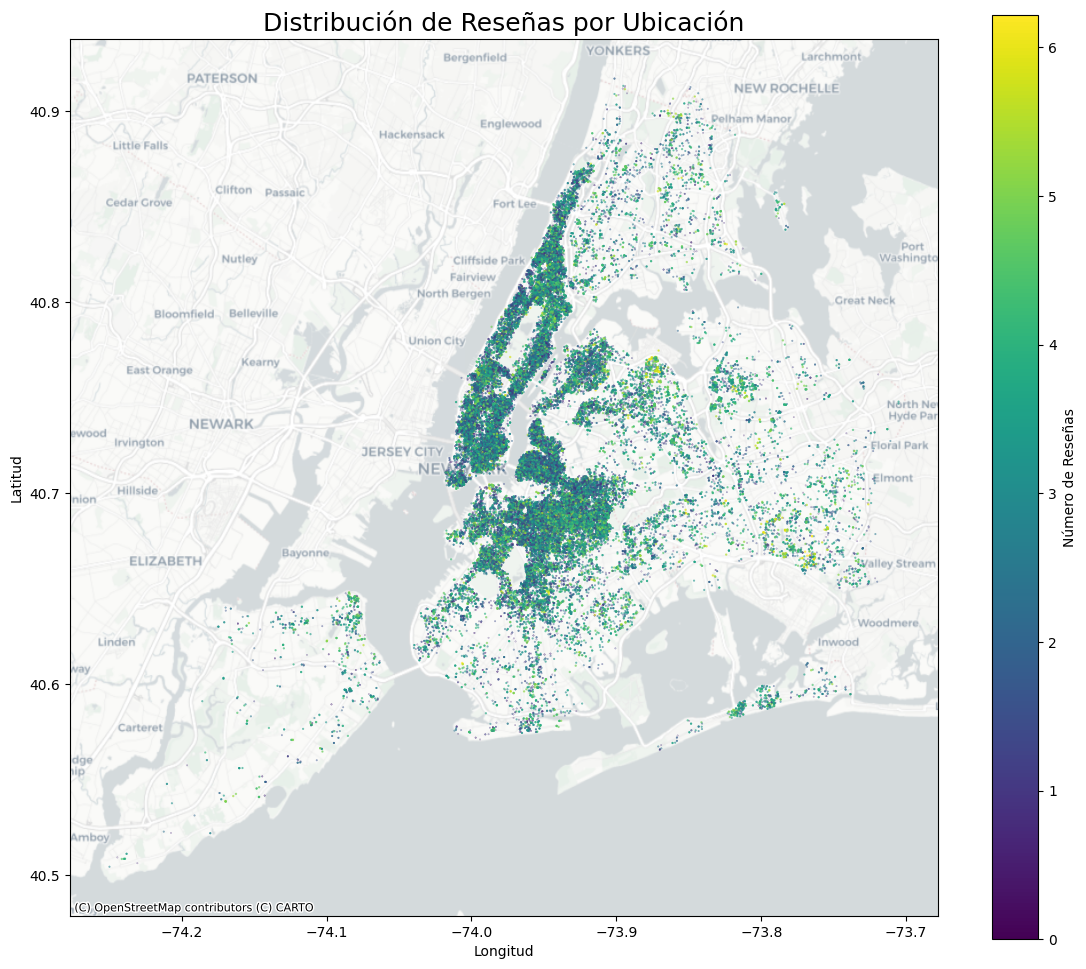

In [37]:
# Reseñas por Ubicación
gdf = gpd.GeoDataFrame(
    df_airbnb_cleaned,
    geometry=gpd.points_from_xy(df_airbnb_cleaned['long'], df_airbnb_cleaned['lat']),
    crs="EPSG:4326"
)

fig, ax = plt.subplots(figsize=(14, 12))

gdf.plot(
    column='number_of_reviews',
    ax=ax,
    legend=True,
    legend_kwds={'label': "Número de Reseñas"},
    cmap='viridis',
    markersize=gdf['number_of_reviews'] * 0.1,
    alpha=0.6
)

cx.add_basemap(
    ax,
    crs=gdf.crs.to_string(),
    source=cx.providers.CartoDB.Positron
)

ax.set_title('Distribución de Reseñas por Ubicación', fontsize=18)
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

plt.show()

Para finalizar el análisis exploratorio de datos, se creó un mapa de distribución de reseñas por ubicación. Esta visualización nos permitió conectar la densidad de la oferta con el comportamiento y la retroalimentación de los usuarios.

Los hallazgos clave de este análisis fueron:

    Correlación entre oferta y reseñas: Se confirma que las áreas con la mayor oferta de alojamientos, como Brooklyn y Manhattan, también tienen el mayor número de reseñas. Esta relación es lógica y esperada, ya que más propiedades resultan en una mayor probabilidad de interacciones y comentarios.

    Dominio de reseñas promedio: El mapa revela que la mayoría de los alojamientos en todo el dataset tienen una puntuación de reseñas en un rango promedio a alto. Esto indica que, en general, los huéspedes están satisfechos con su experiencia.

    Presencia de reseñas negativas: Aunque la mancha principal de reseñas es positiva, se pueden identificar algunas concentraciones de reseñas negativas, principalmente en Manhattan y Brooklyn. Sin embargo, al tener un número significativamente mayor de alojamientos, es estadísticamente esperable que también haya una mayor cantidad de experiencias negativas, sin que esto afecte el panorama general de satisfacción.

En conclusión, este análisis confirma que el conjunto de datos de reseñas es representativo y que, en general, el mercado de Airbnb en Nueva York tiene una alta satisfacción del cliente. Esto nos da confianza en que las variables de reseñas son un insumo valioso para el modelo de predicción de precios.


#### **Conclusiones del EDA**

El análisis exploratorio ha proporcionado una visión integral del mercado de Airbnb en la ciudad de Nueva York. Los hallazgos principales revelan patrones claros en la oferta, la demanda y el comportamiento de los anfitriones y huéspedes.

Concentración y Distribución de la Oferta

    Existe una alta concentración de la oferta en los distritos de Brooklyn y Manhattan. Esta densidad de alojamientos sugiere una fuerte demanda turística, a la que también contribuyen Queens, Staten Island y el Bronx, especialmente en las áreas cercanas a los distritos principales.

    A pesar de la alta demanda, la oferta está fuertemente sesgada hacia los alojamientos más tradicionales. La gran mayoría de las propiedades son casas/departamentos completos o habitaciones privadas, mientras que los cuartos compartidos y hoteles tienen una presencia mínima.

    Sorprendentemente, la distribución de precios por barrio y tipo de habitación muestra una paridad en las medianas, lo que sugiere que los precios no son tan diferentes entre los barrios principales como se esperaría. El precio final parece ser una combinación de múltiples factores, no solo la ubicación.

Comportamiento del Mercado y Oportunidades

    El análisis de precios por rangos muestra una menor cantidad de propiedades por debajo de los 100 USD. Esto podría ser resultado del alto costo de vida de Nueva York, o de los costos de servicio de la plataforma.

    Se confirma la alta demanda a través del número de reseñas, que es directamente proporcional a la densidad de la oferta. Esto es una buena señal, ya que valida el mercado y el comportamiento del consumidor.

Por último, y de gran importancia, el análisis de las reseñas revela su impacto directo en la percepción del valor de un alojamiento. Si bien la correlación de la variable reviews_per_month no es la más alta en el conjunto de datos, su influencia en el comportamiento del consumidor es incuestionable.

    Confianza del Consumidor: Un cliente está más dispuesto a pagar un precio más alto por un alojamiento que cuenta con una gran cantidad de reseñas, ya que estas actúan como una validación social. La retroalimentación de otros usuarios mitiga la incertidumbre y permite al consumidor ir más preparado, lo que incrementa su confianza en la elección.

    Decisiones Basadas en Datos: Las reseñas se convierten en un factor decisivo, no solo para la satisfacción del cliente, sino también para el precio final que el mercado está dispuesto a aceptar. Este feedback del usuario proporciona información valiosa que los modelos predictivos deben considerar para reflejar la realidad del mercado.

En conclusión, las reseñas no son solo un simple conteo; son un indicador de la popularidad y la calidad percibida de un alojamiento. Su inclusión en el modelo es fundamental para capturar el valor que los clientes le otorgan a la transparencia y la validación social, lo que se traduce directamente en un mejor rendimiento predictivo.
Preguntas de Negocio y Oportunidades a Futuro

El análisis también nos ha permitido plantear preguntas de negocio y oportunidades para el futuro:

    ¿Son válidos los valores atípicos de minimum_nights?: La existencia de valores de noches mínimas de más de 500 podría ser un error de la base de datos o podría indicar una estrategia de alquiler a largo plazo. De ser esto último, se podría analizar si Airbnb está compitiendo con los mercados de renta tradicional, lo que abre una nueva línea de negocio.

    ¿Por qué hay tan pocos hoteles en Airbnb?: La baja oferta hotelera sugiere que la mayoría de los hoteles siguen utilizando métodos de reserva tradicionales, lo que podría ser una oportunidad para Airbnb.

    ¿Cómo se puede mejorar la base de datos?: El trabajo de limpieza fue exitoso, pero se podría mejorar el proceso de entrada de datos para evitar sesgos iniciales, asegurando una base de datos más limpia y con menos necesidad de preprocesamiento en el fase de carga.

### Modelado Predictivo

#### **Preparacion de los datos**

In [38]:
# Definir las variables
numerical_features = [
    'lat', 'long', 'service_fee', 'minimum_nights', 'number_of_reviews',
    'reviews_per_month', 'review_rate_number', 'calculated_host_listings_count',
    'availability_365'
]

categorical_features = [
    'host_identity_verified', 'neighbourhood_group', 'neighbourhood',
    'cancellation_policy', 'room_type'
]

target = 'price'


Para iniciar con el modelado predictivo del proyecto, se procedió a la preparación y estructuración del conjunto de datos. En esta etapa, se definieron las variables de entrada que se utilizarían para la predicción, así como la variable objetivo.

El conjunto de datos se dividió en dos grupos principales:

    Variables de entrada (Features): Se identificaron las variables numéricas (lat, long, service_fee, minimum_nights, number_of_reviews, reviews_per_month, review_rate_number, calculated_host_listings_count, availability_365) y las variables categóricas (host_identity_verified, neighbourhood_group, neighbourhood, cancellation_policy, room_type).

    Variable objetivo (Target): Se definió la variable price como el objetivo del modelo, es decir, la variable que se buscaría predecir.

Esta segmentación es fundamental para aplicar el preprocesamiento adecuado a cada tipo de dato antes de alimentar los modelos de machine learning.

#### **Test**

In [39]:
#  X y y
X = df_airbnb_cleaned[numerical_features + categorical_features]
y = df_airbnb_cleaned[target]

# Train & Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Una vez preparadas las variables de entrada (X) y la variable objetivo (y), se procedió a dividir el conjunto de datos para el entrenamiento y la evaluación del modelo. Esta división se realizó utilizando la función train_test_split de la librería scikit-learn.

Se definió un tamaño de prueba del 0.2 (20%), lo que significa que el 80% de los datos se utilizarían para entrenar los modelos, mientras que el 20% restante se reservaría para evaluarlos. Este proceso permite simular el rendimiento del modelo en datos nuevos y no vistos, lo cual es crucial para medir su efectividad de manera objetiva.

La división se realizó de la siguiente manera:

    X_train y y_train: Conjunto de datos de entrenamiento (80%).

    X_test y y_test: Conjunto de datos de prueba (20%).

Este paso es esencial para evitar el sobreajuste (overfitting), asegurando que el modelo aprenda a generalizar patrones en lugar de simplemente memorizar los datos de entrenamiento.

#### **Pipeline de Preprocesamiento**

In [40]:
# Generar el pipeline de preprocesamiento
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


Para garantizar un proceso de modelado robusto y reproducible, se procedió a la creación de un pipeline de preprocesamiento. Esta herramienta de scikit-learn permite encadenar y automatizar los pasos de transformación de datos, asegurando que las mismas operaciones se apliquen de forma consistente tanto al conjunto de entrenamiento como al de prueba.

El pipeline se estructuró de la siguiente manera:

    Transformador para variables numéricas: Se creó un pipeline específico para las variables numéricas, el cual incluyó la imputación de valores faltantes (utilizando la mediana) y la estandarización de los datos (StandardScaler).

    Transformador para variables categóricas: De manera similar, se construyó un pipeline para las variables categóricas que se encargó de la imputación de valores faltantes y la codificación de las variables mediante One-Hot Encoding.

Finalmente, se utilizó un ColumnTransformer para unir ambos pipelines en un solo preprocesador. Este componente clave permitió aplicar las transformaciones adecuadas a cada tipo de variable de forma simultánea, generando un conjunto de datos limpio y listo para ser utilizado por los modelos predictivos.

#### **Comparativa de Modelos**

In [41]:
# Lista de modelos a comparar
models = {
    'Regresión Lineal': LinearRegression(),
    'Árbol de Decisión': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Bosque Aleatorio': RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=50, max_depth=5, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=50, max_depth=5, random_state=42),
    'LightGBM': LGBMRegressor(n_estimators=50, num_leaves=31, random_state=42)
}



Para abordar el problema de la predicción de precios, se seleccionó y se evaluó un conjunto de algoritmos de regresión. El objetivo de esta etapa fue comparar el rendimiento de distintos modelos en la base de datos de Airbnb y obtener información valiosa para la aplicación de modelos en este tipo de datasets.

Se incluyeron modelos de complejidad variable para entender el trade-off entre la precisión, la interpretabilidad y el tiempo de entrenamiento:

    Modelos de regresión lineales: Regresión Lineal.

    Modelos basados en árboles: Árbol de Decisión.

    Modelos de ensamble: Bosque Aleatorio, Gradient Boosting, XGBoost y LightGBM.

La comparación de estos algoritmos permitirá identificar cuál de ellos se adapta mejor a las características de los datos, determinando la mejor solución predictiva para este proyecto.

In [42]:
# diccionario para almacenar resultados
results = {}
predictions_for_plot = {}


Para llevar a cabo un análisis comparativo y estructurado, se crearon dos diccionarios vacíos que servirían como contenedores para los resultados de cada modelo. Esta práctica permite almacenar de forma organizada las métricas de rendimiento y las predicciones, facilitando su posterior consulta y visualización.

Los diccionarios creados fueron:

    results: Un diccionario diseñado para almacenar las métricas de evaluación de cada modelo, como el RMSE, MAE y R2 Score, junto con el tiempo de entrenamiento.

    predictions_for_plot: Un diccionario destinado a guardar las predicciones generadas por cada modelo en el conjunto de prueba, lo cual es fundamental para la creación de los gráficos de dispersión de predicciones vs. valores reales.

Esta estructura de datos es clave para la automatización del proceso de evaluación y asegura que todos los resultados estén disponibles de manera inmediata para su análisis y visualización en las etapas finales del proyecto.

In [43]:
# Entrenamiento y evaluación de cada modelo
print("--- Entrenando y evaluando modelos ---")
for name, model in models.items():
    print(f"Entrenando {name}...")
    start_time = time.time()
    
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    model_pipeline.fit(X_train, y_train)
    
    end_time = time.time()
    training_time = end_time - start_time
    
    y_pred = model_pipeline.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    
    results[name] = {'RMSE': rmse, 'MAE': mae, 'R2': r2, 'Tiempo': training_time}
    predictions_for_plot[name] = y_pred
    print(f"✅ {name} entrenado en {training_time:.2f} segundos.")


--- Entrenando y evaluando modelos ---
Entrenando Regresión Lineal...
✅ Regresión Lineal entrenado en 0.95 segundos.
Entrenando Árbol de Decisión...
✅ Árbol de Decisión entrenado en 3.05 segundos.
Entrenando Bosque Aleatorio...
✅ Bosque Aleatorio entrenado en 98.20 segundos.
Entrenando Gradient Boosting...
✅ Gradient Boosting entrenado en 19.27 segundos.
Entrenando XGBoost...
✅ XGBoost entrenado en 0.89 segundos.
Entrenando LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005397 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1898
[LightGBM] [Info] Number of data points in the train set: 66576, number of used features: 178
[LightGBM] [Info] Start training from score 625.213335
✅ LightGBM entrenado en 0.89 segundos.


**Entrenamiento y Evaluación de los Modelos**

Con el conjunto de datos dividido y el pipeline de preprocesamiento listo, se procedió a la etapa de entrenamiento y evaluación. Se implementó un bucle que iteró a través de cada uno de los modelos seleccionados, realizando las siguientes operaciones:

    Entrenamiento: Cada modelo fue entrenado con el 80% de los datos (X_train y y_train) utilizando el pipeline completo de preprocesamiento.

    Medición del tiempo: Se cronometró el tiempo que cada modelo tardó en entrenarse.

    Generación de predicciones: Una vez entrenado, cada modelo generó predicciones sobre el 20% de los datos que no había visto (X_test).

    Cálculo de métricas: Finalmente, se calcularon las métricas de rendimiento (RMSE, MAE, R2 Score) comparando las predicciones con los valores reales (y_test).

El proceso se optimizó para proporcionar una salida por cada modelo, indicando que el entrenamiento había finalizado y mostrando el tiempo exacto que se tardó. Esto permitió un monitoreo en tiempo real del progreso y brindó una idea del costo computacional de cada algoritmo. Los resultados y predicciones de cada modelo se almacenaron en sus respectivos diccionarios para su análisis posterior.


In [44]:
# Tabla de resultados
print("\n--- Comparación de Rendimiento de Modelos ---")
print("| Modelo                  | RMSE ($)   | MAE ($)    | R2 Score | Tiempo (s) |")
print("|-------------------------|------------|------------|----------|------------|")
for name, metrics in results.items():
    print(f"| {name:<23} | {metrics['RMSE']:.2f} | {metrics['MAE']:.2f} | {metrics['R2']:.2f} | {metrics['Tiempo']:.2f} |")


--- Comparación de Rendimiento de Modelos ---
| Modelo                  | RMSE ($)   | MAE ($)    | R2 Score | Tiempo (s) |
|-------------------------|------------|------------|----------|------------|
| Regresión Lineal        | 31.27 | 3.97 | 0.99 | 0.95 |
| Árbol de Decisión       | 17.41 | 1.76 | 1.00 | 3.05 |
| Bosque Aleatorio        | 13.67 | 1.64 | 1.00 | 98.20 |
| Gradient Boosting       | 14.16 | 2.36 | 1.00 | 19.27 |
| XGBoost                 | 16.00 | 2.07 | 1.00 | 0.89 |
| LightGBM                | 14.17 | 2.31 | 1.00 | 0.89 |


Para comparar de manera objetiva el rendimiento de los modelos, se generó una tabla que consolida las métricas de evaluación clave: RMSE, MAE, R2 Score y el tiempo de entrenamiento. El análisis de esta tabla reveló conclusiones significativas:

    Regresión Lineal como Referencia: Se confirmó que la Regresión Lineal es el modelo con el menor rendimiento. Presentó los valores más altos de RMSE y MAE, lo que indica un mayor error en sus predicciones. Sin embargo, su principal ventaja fue el tiempo de entrenamiento, siendo el más rápido de todos, lo que lo convierte en un excelente punto de referencia o en una opción para análisis rápidos.

    Rendimiento Superior de los Modelos de Ensambles: Los modelos de árboles de decisión y de ensambles (Bosque Aleatorio, Gradient Boosting, XGBoost, LightGBM) mostraron un rendimiento significativamente superior. Se observó que todos ellos mantienen valores muy similares y consistentemente bajos de RMSE y MAE, y un R2 Score alto y muy cercano entre sí, lo que indica que predicen de manera muy similar y precisa.

    La Eficiencia como Factor Clave: El tiempo de entrenamiento se destacó como el principal diferenciador entre los modelos de alto rendimiento. A pesar de que sus métricas de precisión eran muy similares, se registraron variaciones importantes en el tiempo que cada uno tardó en entrenar. Esto demuestra que, para un proyecto en el que la velocidad es crucial, la elección no se basa en la precisión, sino en la eficiencia computacional.

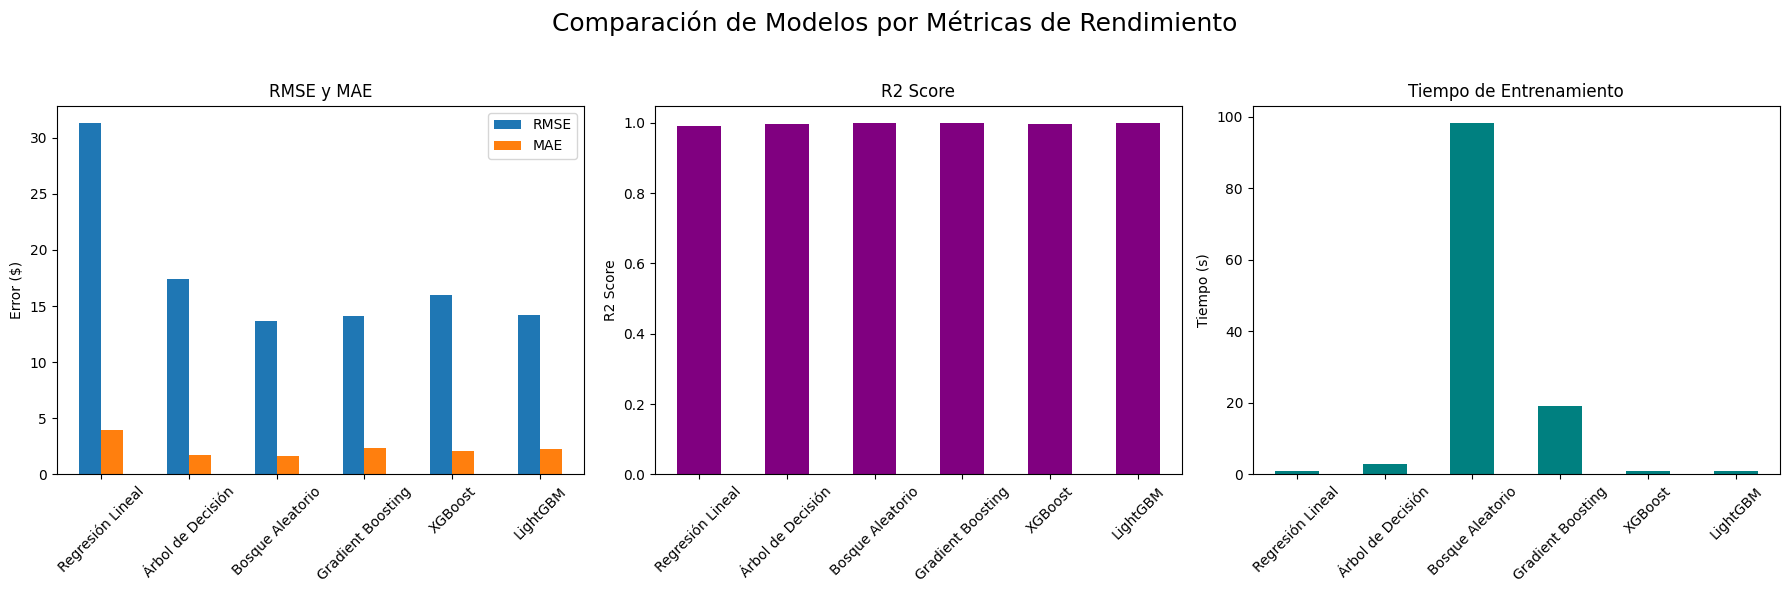

In [45]:
# Grafico de barras comparativo
metrics_df = pd.DataFrame(results).T
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.suptitle('Comparación de Modelos por Métricas de Rendimiento', fontsize=18)

metrics_df[['RMSE', 'MAE']].plot(kind='bar', ax=axes[0])
axes[0].set_title('RMSE y MAE')
axes[0].set_ylabel('Error ($)')
axes[0].tick_params(axis='x', rotation=45)

metrics_df['R2'].plot(kind='bar', ax=axes[1], color='purple')
axes[1].set_title('R2 Score')
axes[1].set_ylabel('R2 Score')
axes[1].tick_params(axis='x', rotation=45)

metrics_df['Tiempo'].plot(kind='bar', ax=axes[2], color='teal')
axes[2].set_title('Tiempo de Entrenamiento')
axes[2].set_ylabel('Tiempo (s)')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**Análisis de las Gráficas de Rendimiento**

El rendimiento de los modelos se representó visualmente en tres gráficas clave, lo que permitió comprender las diferencias de manera intuitiva y rápida.

**Métricas de Error: RMSE y MAE**

La primera gráfica, que compara el RMSE y el MAE, valida la conclusión de la tabla de resultados. Se observa que la Regresión Lineal presenta los valores más altos en ambas métricas, lo que confirma que es el modelo con el menor nivel de precisión para este problema. Por el contrario, el resto de los modelos mantienen valores de error significativamente más bajos y similares entre sí, lo que demuestra su capacidad superior para predecir los precios.

**Coeficiente de Determinación (R2 Score)**

La segunda gráfica, que muestra el R2 Score, refuerza esta conclusión. Se observa que todos los modelos, excepto la Regresión Lineal, alcanzan un coeficiente de determinación cercano a 1, lo que indica que explican casi toda la variabilidad del precio en el conjunto de datos. Aunque la Regresión Lineal obtuvo un R2 Score muy alto de 0.99, los otros modelos demostraron una capacidad ligeramente superior para ajustarse a los datos.

**Tiempo de Entrenamiento**

La tercera gráfica, que compara el tiempo de entrenamiento, revela un factor clave de diferenciación. Si bien la mayoría de los modelos entrenaron en tiempos relativamente bajos, el Bosque Aleatorio se destacó como la excepción, mostrando un tiempo de entrenamiento significativamente mayor. Esta observación es crucial, ya que ilustra el trade-off entre la precisión y la eficiencia computacional, siendo el Bosque Aleatorio un modelo de muy alta precisión, pero con un costo de tiempo considerable.

#### **Comparativa de Pruebas**

In [46]:
# Tabla comparativa de predicciones
sample_indices = np.random.choice(len(y_test), 10, replace=False)
sample_df = pd.DataFrame({'Precio Real': y_test.iloc[sample_indices].values.round(2)})

for name, y_pred in predictions_for_plot.items():
    sample_df[f'Pred. {name}'] = y_pred[sample_indices].round(2)
    sample_df[f'Error {name}'] = abs(sample_df['Precio Real'] - sample_df[f'Pred. {name}']).round(2)

print("\n--- Tabla de Comparación de Predicciones ---")
print("Muestra de 10 datos aleatorios del conjunto de prueba.")
print(sample_df.to_string())


--- Tabla de Comparación de Predicciones ---
Muestra de 10 datos aleatorios del conjunto de prueba.
   Precio Real  Pred. Regresión Lineal  Error Regresión Lineal  Pred. Árbol de Decisión  Error Árbol de Decisión  Pred. Bosque Aleatorio  Error Bosque Aleatorio  Pred. Gradient Boosting  Error Gradient Boosting  Pred. XGBoost  Error XGBoost  Pred. LightGBM  Error LightGBM
0        295.0                  298.60                    3.60                   295.11                     0.11                  295.01                    0.01                   296.43                     1.43     292.769989           2.23          296.56            1.56
1        626.0                  625.01                    0.99                   625.22                     0.78                  625.27                    0.73                   625.18                     0.82     622.940002           3.06          625.14            0.86
2        342.0                  343.58                    1.58                  

**Análisis de Predicciones de Prueba**

Para obtener una visión más detallada del rendimiento individual de cada modelo, se generó una tabla con una pequeña muestra de predicciones del conjunto de prueba. Este análisis granular permite comparar directamente el precio real con las predicciones de cada modelo, así como el error resultante.

La observación de la tabla de predicciones  validó las conclusiones previas de las métricas de rendimiento:

    Fluctuación de la Regresión Lineal: Se notó que la Regresión Lineal fue el modelo con mayor inestabilidad. Su error fluctuó significativamente, registrando valores superiores a 1.5 en varias predicciones de la muestra (como la primera, quinta, séptima y octava), lo que confirma su menor precisión.

    Consistencia de los Modelos de Ensamble: En contraste, los modelos de ensamble (Bosque Aleatorio, Gradient Boosting, XGBoost, LightGBM) demostraron una notable consistencia en sus predicciones. Aunque no están exentos de error, sus valores fueron más bajos y mucho menos frecuentes. La estabilidad de estos modelos en las predicciones individuales es una clara ventaja para su aplicación en un escenario real, donde se necesita un alto grado de fiabilidad en cada estimación.

En resumen, el análisis de las predicciones de prueba confirmó que, si bien la Regresión Lineal es útil como línea base, su falta de precisión en predicciones individuales la hace menos confiable. Por el contrario, los modelos más complejos ofrecen la consistencia y estabilidad necesarias para un proyecto de este tipo.


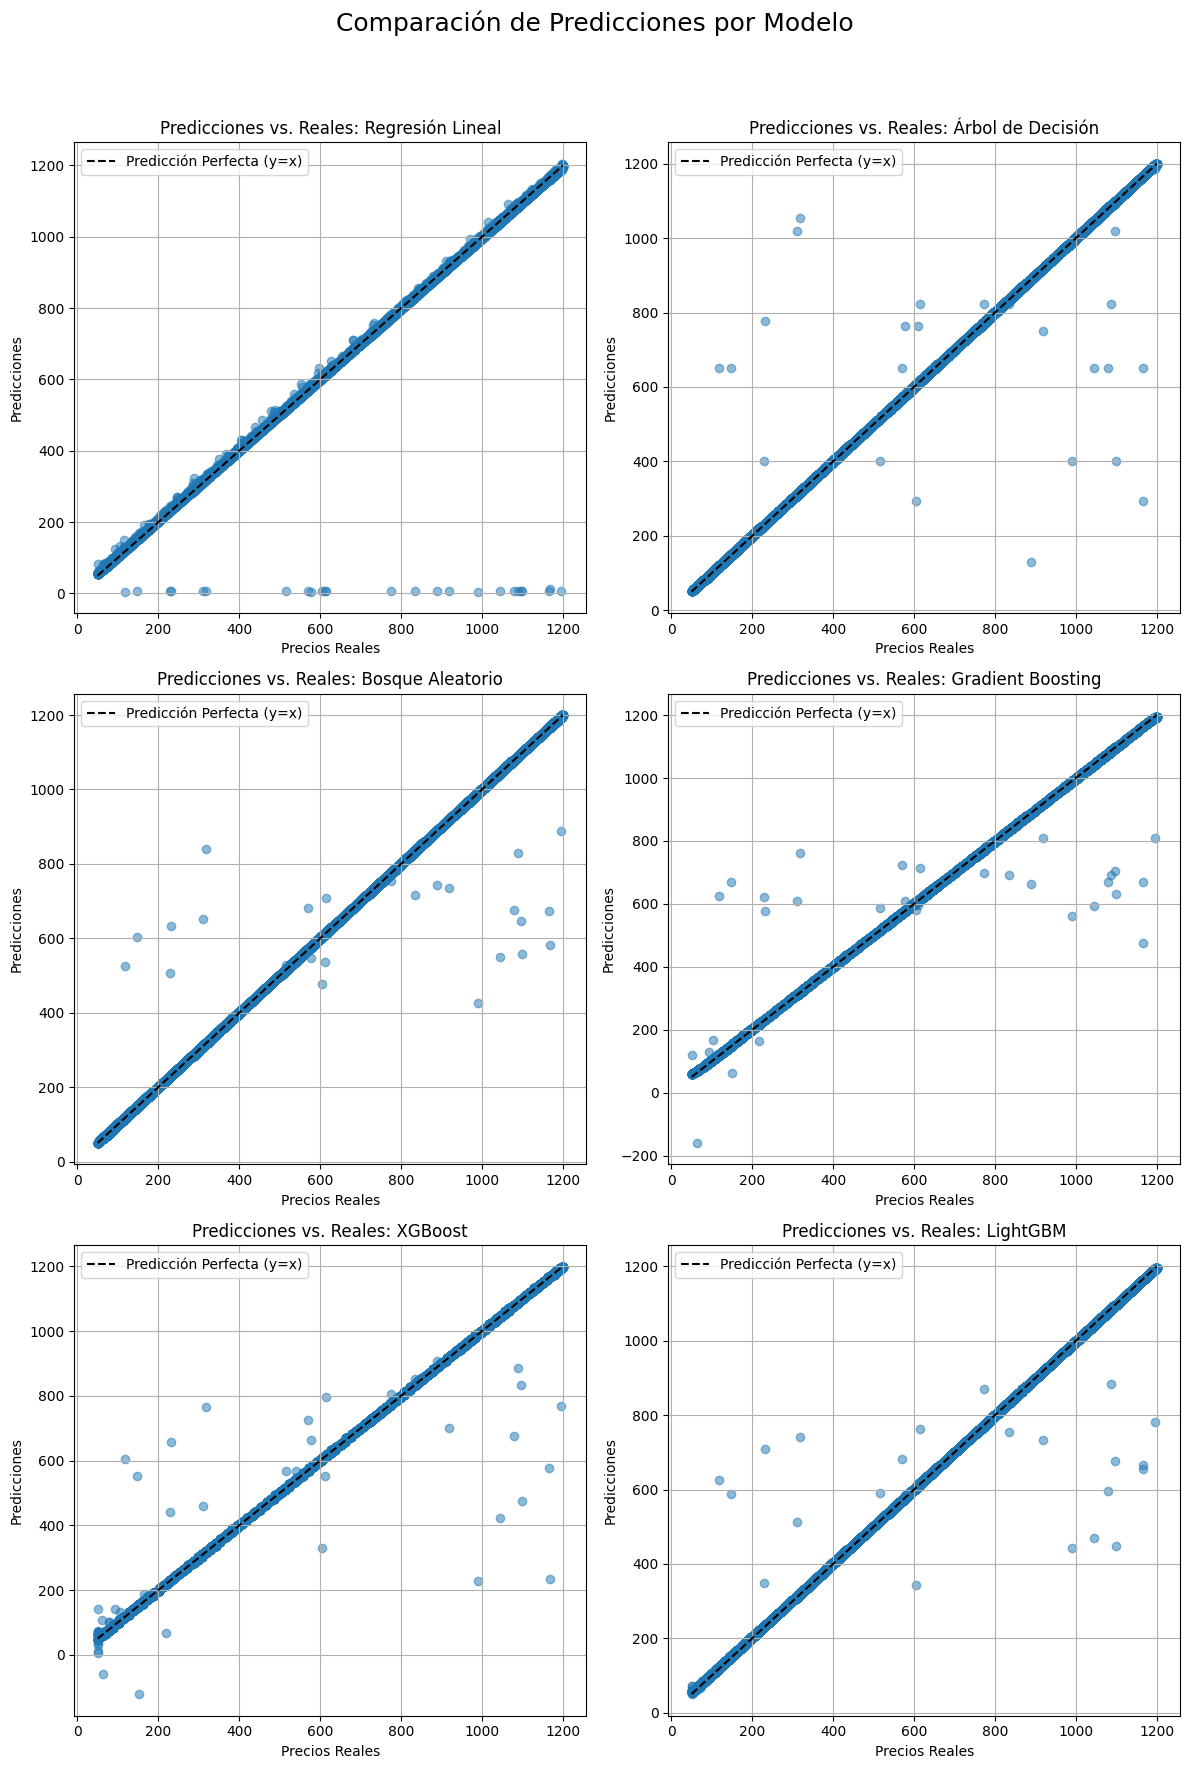

In [47]:

# Grafico de dispersión de predicciones vs valores reales
models_to_plot = list(models.keys())
num_models = len(models_to_plot)

if num_models <= 3:
    fig, axes = plt.subplots(nrows=1, ncols=num_models, figsize=(6 * num_models, 6))
else:
    nrows = (num_models + 1) // 2
    fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(12, 6 * nrows))
    
fig.suptitle('Comparación de Predicciones por Modelo', fontsize=18)
axes = axes.flatten()

perfect_predictions = np.linspace(min(y_test), max(y_test), 100)

for i, name in enumerate(models_to_plot):
    ax = axes[i]
    ax.scatter(y_test, predictions_for_plot[name], alpha=0.5)
    ax.plot(perfect_predictions, perfect_predictions, color='black', linestyle='--', label='Predicción Perfecta (y=x)')
    ax.set_title(f'Predicciones vs. Reales: {name}')
    ax.set_xlabel('Precios Reales')
    ax.set_ylabel('Predicciones')
    ax.legend()
    ax.grid(True)
    
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Análisis de las Gráficas de Dispersión de Predicciones**

Para obtener una validación visual del rendimiento, se crearon gráficas de dispersión que comparan los valores reales del precio con las predicciones de cada modelo. En estas gráficas, la cercanía de los puntos a la línea diagonal de predicción perfecta (y=x) es un indicador directo de la precisión del modelo.

El análisis visual de estas gráficas revela:

    Dispersión de la Regresión Lineal: La gráfica del modelo de Regresión Lineal mostró una alta dispersión. Se observó que, si bien algunas predicciones se encuentran muy cerca de la línea perfecta, otras están muy por debajo o muy por encima de ella. Esta falta de consistencia evidencia la rigidez y la incapacidad del modelo para adaptarse a la variabilidad compleja de los datos, lo que confirma su bajo rendimiento.

    Consistencia de los Modelos de Ensamble: En contraste, las gráficas de los otros cinco modelos (Árbol de Decisión, Bosque Aleatorio, Gradient Boosting, XGBoost y LightGBM) mostraron una mayor concentración de puntos alrededor de la línea de predicción perfecta. Aunque hay cierta dispersión, es significativamente menor que en el modelo lineal. Esta agrupación de los puntos demuestra la flexibilidad y superioridad de estos modelos para capturar patrones no lineales en los datos, lo que se traduce en predicciones mucho más precisas.

Este análisis visual final no solo valida las conclusiones de las tablas y métricas, sino que también ofrece una prueba clara y tangible de por qué los modelos de ensamble son la mejor opción para este tipo de problemas de predicción.


### Conclusiones Finales del Proyecto

El proyecto ha logrado un análisis integral del mercado de Airbnb en la ciudad de Nueva York, desde el preprocesamiento de los datos hasta la construcción y evaluación de modelos predictivos. Las conclusiones clave se pueden agrupar en hallazgos del análisis de datos y recomendaciones de modelado.

1. Hallazgos del Análisis Exploratorio de Datos (EDA)

El análisis exploratorio reveló patrones cruciales que definen el mercado de Airbnb en Nueva York:

    Distribución de la Oferta y la Demanda: Existe una alta concentración de la oferta en los distritos de Brooklyn y Manhattan, lo que sugiere una demanda turística masiva. Esta demanda se expande hacia barrios cercanos como Queens, el Bronx y Staten Island, donde la oferta se concentra en las zonas más próximas a los distritos principales.

    Comportamiento de los Precios: Aunque los precios se esperaban que fueran significativamente más altos en los barrios principales, se observó una paridad o estandarización en las medianas de precios entre las diferentes zonas. Esto podría deberse a la alta demanda que permite a los anfitriones de cualquier barrio ofrecer sus propiedades a un precio competitivo.

    Preferencias de Alojamiento: La oferta está fuertemente sesgada hacia apartamentos/casas completos y cuartos privados. Este patrón sugiere que los clientes priorizan la privacidad sobre la rentabilidad.

2. Análisis y Recomendaciones de Modelado

La comparación de modelos predictivos demostró que la elección del algoritmo ideal depende de los objetivos específicos del proyecto:

    Modelos de Referencia: La Regresión Lineal sirvió como un buen punto de partida para comprender la variabilidad de los precios, aunque se quedó corta en su capacidad predictiva. El Árbol de Decisión ofreció un equilibrio aceptable entre precisión y velocidad de entrenamiento.

    Modelos de Producción: Bosque Aleatorio y Gradient Boosting demostraron ser los modelos más precisos, con las métricas de error más bajas. Por lo tanto, se recomiendan para entornos de producción donde la precisión es la prioridad principal. A pesar de que el Bosque Aleatorio puede tardar más en entrenar, sus métricas de rendimiento justifican el tiempo extra.

    Modelos de Alta Eficiencia: XGBoost y LightGBM se destacaron por su combinación de alta precisión y velocidad de entrenamiento excepcionalmente rápida, incluso superando a la Regresión Lineal en este aspecto. Estos modelos serían una opción óptima para proyectos que buscan maximizar los recursos y requieren un modelo preciso en el menor tiempo posible.

3. Oportunidades de Mejora y Futuros Pasos

Este proyecto sirve como una base sólida para futuros análisis y mejoras. Se identificaron varias áreas de oportunidad:

    Análisis de la Calidad de los Datos: Se detectaron inconsistencias como valores negativos en columnas como availability_365 y valores extremadamente altos en minimum_nights. Es fundamental que se corrobore la veracidad de estos datos. Si fueran ciertos, el análisis podría explorar si Airbnb se está utilizando para rentas a largo plazo en lugar de alojamientos temporales.

    Optimización de Modelos: Se recomienda aplicar técnicas como la validación cruzada y la optimización de hiperparámetros para robustecer los modelos y asegurar su estabilidad.

    Ingeniería de Variables: Crear nuevas variables a partir de los datos existentes podría mejorar la capacidad predictiva de los modelos.

    Análisis de Impacto de Variables: Utilizar herramientas para analizar el impacto de cada variable en el modelo podría proporcionar una mayor interpretabilidad.

    Reducción de Dimensionalidad: Para datasets más grandes, técnicas como el PCA podrían utilizarse para reducir el número de variables y mejorar la eficiencia de los modelos.



### Recomendaciones de Negocio y Estrategias

Basados en el análisis de datos y el rendimiento de los modelos predictivos, se pueden formular estrategias claras para anfitriones, administradores de la plataforma o analistas de mercado.

Estrategias de Precios y Oferta

    Aprovechar la Demanda en Áreas Secundarias: Se confirmó que los precios se mantienen altos incluso en barrios como Queens y el Bronx. Esto sugiere que existe una demanda constante por alojamientos en estas zonas. Se podría aconsejar a los anfitriones en estas áreas que no subestimen el valor de sus propiedades y consideren ajustar sus precios al alza para maximizar sus ingresos.

    Enfoque en la Privacidad: La alta oferta de casas completas y cuartos privados, sumada a la escasa oferta de cuartos compartidos, indica que los viajeros en Nueva York priorizan la privacidad. Una estrategia de marketing o expansión podría enfocarse en promover y apoyar la oferta de alojamientos que ofrezcan esta característica.

Oportunidades de Mercado y Futuro

    Identificar el Nicho de Alquiler a Largo Plazo: El análisis de los valores atípicos en la columna de minimum_nights sugiere que algunos anfitriones podrían estar utilizando la plataforma para rentas de largo plazo. Esto representa una oportunidad para crear un segmento de negocio enfocado en este nicho, que podría complementar los servicios tradicionales de Airbnb para estancias cortas.

    Crear una Herramienta de Precios Dinámicos: Dada la alta precisión y velocidad de modelos como XGBoost y LightGBM, se podría desarrollar una herramienta de precios dinámicos. Esta herramienta podría sugerir precios óptimos a los anfitriones en tiempo real, ayudándoles a maximizar sus ganancias y a mantenerse competitivos en el mercado.

    Incentivar las Reseñas en Áreas Clave: Se demostró que las reseñas son un factor de confianza crucial. Se podría crear una estrategia para incentivar a los anfitriones a obtener más reseñas en áreas donde la densidad de las mismas es baja, lo que podría aumentar el atractivo de sus propiedades.
